## Preparación del conjunto de datos
En este notebook empleados algunas de las técnicas más utilizadas para transformar el conjunto de datos

In [1]:
 #Tratamiento de datos
# =====================
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.cluster import KMeans

# Gráficos
# ==============================================================================
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ===============================================================
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Funciones para división del cinjunto de datos en tres partes
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

## Lectura del conjunto de datos

In [3]:
#se utilizara un unico subconjutno de Train(subrayado en verde)
data = pd.read_excel('/content/microEmpresas_PlataformasDigitales.xlsx')
columns = (['nombre', 'ciudad', 'nombreEmpresario', 'nombreEmpresa', 'direccion',
            'barrio', 'telefono', 'estratoBarrio', 'antiguedadEmpresa', 'numEmpleados',
            'actividadEconomica', 'tieneRUT', 'tiempoFormalizacionEmpresa', 'plataformaDigital',
            'tiempoUsoPlatDigital', 'motivoUsoPlatDigital', 'dificultadUsoPlatDigital', 'riesgoUsoPlatDigital',
            'inconvenienteUsoPlataformas','VentasMensualesPlatDigitales','impactoCrecimientoEmpresa',
            'impactoUtilidadEmpresa', 'impactoVentasEmpresa', 'beneficiosUsoPlatDigitales', 'necesitaCapacitacionUso',
            'entidadApoyoCapacitacion', 'herramientaDigitalMejora', 'recomendacionMejorarUso'])

data.columns = columns
data = data.drop(['nombre', 'ciudad', 'antiguedadEmpresa', 'entidadApoyoCapacitacion', 'actividadEconomica', 'nombreEmpresario', 'necesitaCapacitacionUso', 'nombreEmpresa', 'direccion', 'barrio', 'telefono','tieneRUT','tiempoFormalizacionEmpresa' ,'estratoBarrio', 'herramientaDigitalMejora', 'recomendacionMejorarUso'], axis=1)
data.tail(10)

numEmpleados plataformaDigital tiempoUsoPlatDigital  \
291  1 o 2 empleados             Nequi       Menos de 1 año   
292  1 o 2 empleados             Nequi           1 a 2 años   
293              NaN               NaN                  NaN   
294              NaN               NaN                  NaN   
295              NaN               NaN                  NaN   
296              NaN               NaN                  NaN   
297              NaN               NaN                  NaN   
298              NaN               NaN                  NaN   
299              NaN               NaN                  NaN   
300              NaN               NaN                  NaN   

                                  motivoUsoPlatDigital  \
291  La competencia, o los proveedores y el comerci...   
292  Tuve la iniciativa propia, me informé y empecé...   
293                                                NaN   
294                                                NaN   
295                                                NaN   
296                                                NaN   
297                                                NaN   
298                                                NaN   
299                                                NaN   
300                                                NaN   

    dificultadUsoPlatDigital riesgoUsoPlatDigital inconvenienteUsoPlataformas  \
291          No tuve ninguna              Ninguno                     Ninguno   
292          No tuve ninguna              Ninguno                     Ninguno   
293                      NaN                  NaN                         NaN   
294                      NaN                  NaN                         NaN   
295                      NaN                  NaN                         NaN   
296                      NaN                  NaN                         NaN   
297                      NaN                  NaN                         NaN   
298                      NaN                  NaN                         NaN   
299                      NaN                  NaN                         NaN   
300                      NaN                  NaN                         NaN   

                          VentasMensualesPlatDigitales  \
291  Pocas (entre 20% y 40% del total de ventas son...   
292      Aproximadamente la mitad (entre el 41% y 60%)   
293                                                NaN   
294                                                NaN   
295                                                NaN   
296                                                NaN   
297                                                NaN   
298                                                NaN   
299                                                NaN   
300                                                NaN   

    impactoCrecimientoEmpresa impactoUtilidadEmpresa impactoVentasEmpresa  \
291                     Medio                  Medio                Medio   
292                     Medio                  Medio                Medio   
293                       NaN                    NaN                  NaN   
294                       NaN                    NaN                  NaN   
295                       NaN                    NaN                  NaN   
296                       NaN                    NaN                  NaN   
297                       NaN                    NaN                  NaN   
298                       NaN                    NaN                  NaN   
299                       NaN                    NaN                  NaN   
300                       NaN                    NaN                  NaN   

                           beneficiosUsoPlatDigitales  
291  Me evita recibir billetes falsos y dar devueltas  
292       Evito fiar, porque el dinero está a la mano  
293                                               NaN  
294                                               NaN  
295             

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   numEmpleados                  293 non-null    object
 1   plataformaDigital             293 non-null    object
 2   tiempoUsoPlatDigital          293 non-null    object
 3   motivoUsoPlatDigital          293 non-null    object
 4   dificultadUsoPlatDigital      293 non-null    object
 5   riesgoUsoPlatDigital          293 non-null    object
 6   inconvenienteUsoPlataformas   293 non-null    object
 7   VentasMensualesPlatDigitales  293 non-null    object
 8   impactoCrecimientoEmpresa     293 non-null    object
 9   impactoUtilidadEmpresa        293 non-null    object
 10  impactoVentasEmpresa          293 non-null    object
 11  beneficiosUsoPlatDigitales    293 non-null    object
dtypes: object(12)
memory usage: 28.3+ KB


In [5]:
data = data.drop(data.index[-8:])

In [6]:
data.tail(10)

numEmpleados plataformaDigital tiempoUsoPlatDigital  \
283  1 o 2 empleados             Nequi       Menos de 1 año   
284  1 o 2 empleados     Nequi, Movii            3 a 4 años   
285  1 o 2 empleados  Daviplata, Nequi           1 a 2 años   
286  1 o 2 empleados             Nequi       Menos de 1 año   
287  7 o 8 empleados  Daviplata, Nequi           3 a 4 años   
288  1 o 2 empleados             Nequi       Menos de 1 año   
289  7 o 8 empleados  Daviplata, Nequi           3 a 4 años   
290  3 o 4 empleados             Nequi         7 o más años   
291  1 o 2 empleados             Nequi       Menos de 1 año   
292  1 o 2 empleados             Nequi           1 a 2 años   

                                  motivoUsoPlatDigital  \
283  Tuve la iniciativa propia, me informé y empecé...   
284                                       Mis clientes   
285                                       Mis clientes   
286                                       Mis clientes   
287                                       Mis clientes   
288                                       Mis clientes   
289                                       Mis clientes   
290                                       Mis clientes   
291  La competencia, o los proveedores y el comerci...   
292  Tuve la iniciativa propia, me informé y empecé...   

    dificultadUsoPlatDigital               riesgoUsoPlatDigital  \
283          No tuve ninguna                            Ninguno   
284  Me generaba inseguridad                            Ninguno   
285          No tuve ninguna            Dependencia tecnológica   
286     El acceso a internet                            Ninguno   
287  Me generaba inseguridad            Dependencia tecnológica   
288          No tuve ninguna                            Ninguno   
289  Me generaba inseguridad  Falta de protección al consumidor   
290     El acceso a internet  Falta de protección al consumidor   
291          No tuve ninguna                            Ninguno   
292          No tuve ninguna                            Ninguno   

                         inconvenienteUsoPlataformas  \
283                                          Ninguno   
284                                          Ninguno   
285                                          Ninguno   
286                                          Ninguno   
287                  Problemas de phishing y estafas   
288                                          Ninguno   
289  Interrupciones del sistema y problemas técnicos   
290           Cargos y tarifas ocultas o inesperadas   
291                                          Ninguno   
292                                          Ninguno   

                          VentasMensualesPlatDigitales  \
283  Pocas (entre 20% y 40% del total de ventas son...   
284      Aproximadamente la mitad (entre el 41% y 60%)   
285  Pocas (entre 20% y 40% del total de ventas son...   
286  Rara vez (menos del 20% de los ingresos por ve...   
287                    La mayoría (entre el 61% y 80%)   
288                    La mayoría (entre el 61% y 80%)   
289                    La mayoría (entre el 61% y 80%)   
290  Rara vez (menos del 20% de los ingresos por ve...   
291  Pocas (entre 20% y 40% del total de ventas son...   
292      Aproximadamente la mitad (entre el 41% y 60%)   

    impactoCrecimientoEmpresa impactoUtilidadEmpresa impactoVentasEmpresa  \
283                     Medio                  Medio                Medio   
284                      Alto                   Alto                 Alto   
285                     Medio                  Medio                 Alto   
286                     Medio              Poco útil                Medio   
287                     Medio                   Alto                 Alto   
288                      Alto                  Medio                 Alto   
289                      Alto                   Alto                 Alto   
290                      Alto                  Medio             

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   numEmpleados                  293 non-null    object
 1   plataformaDigital             293 non-null    object
 2   tiempoUsoPlatDigital          293 non-null    object
 3   motivoUsoPlatDigital          293 non-null    object
 4   dificultadUsoPlatDigital      293 non-null    object
 5   riesgoUsoPlatDigital          293 non-null    object
 6   inconvenienteUsoPlataformas   293 non-null    object
 7   VentasMensualesPlatDigitales  293 non-null    object
 8   impactoCrecimientoEmpresa     293 non-null    object
 9   impactoUtilidadEmpresa        293 non-null    object
 10  impactoVentasEmpresa          293 non-null    object
 11  beneficiosUsoPlatDigitales    293 non-null    object
dtypes: object(12)
memory usage: 27.6+ KB


## 1.1 EDA

In [8]:
data.shape

(293, 12)

## ANALIZANDO CARACTERISTICAS

## Plataforma Digital

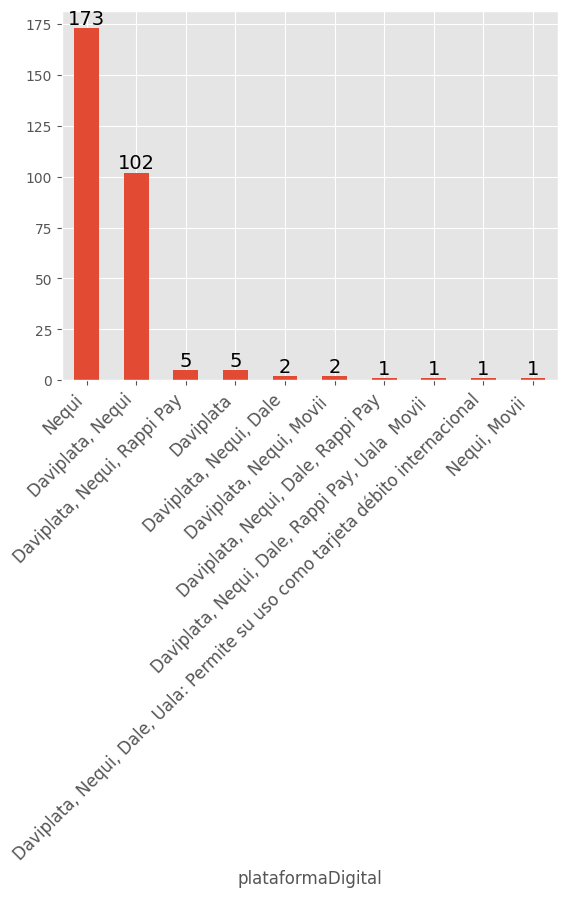

In [9]:
counts = pd.Series(data['plataformaDigital']).value_counts()
ax = counts.plot(kind='bar')

for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

<Axes: xlabel='plataformaDigital', ylabel='Density'>

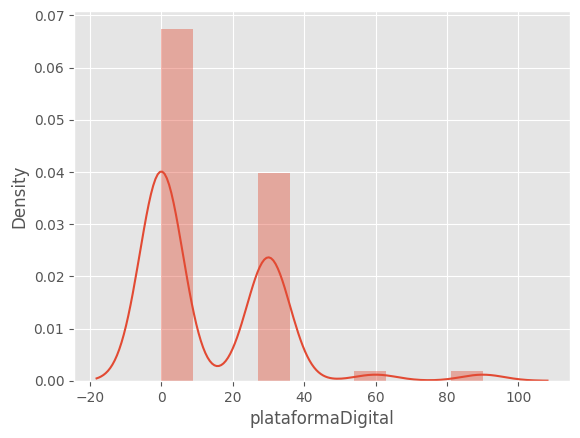

In [10]:
import seaborn as sns

mapping = {'Nequi': 0, 'Daviplata, Nequi': 30, 'Daviplata, Nequi, Rappi Pay': 60, 'Daviplata':90}

data2 = data.copy()

data2['plataformaDigital'] = data2['plataformaDigital'].map(mapping)

sns.distplot(data2.plataformaDigital)

## Tiempo de Uso de la Plataforma Digital

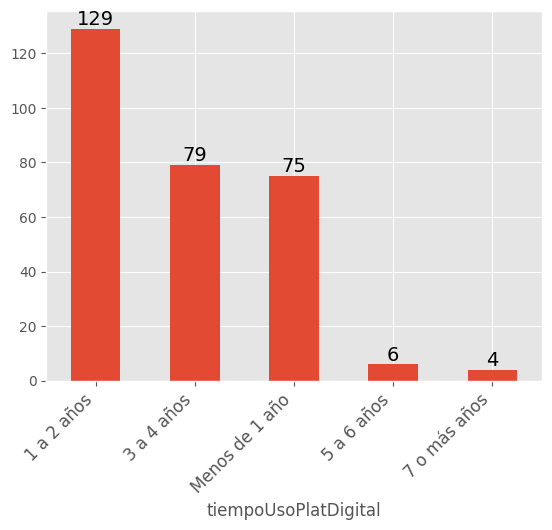

In [11]:
counts = pd.Series(data['tiempoUsoPlatDigital']).value_counts()
ax = counts.plot(kind='bar')

for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

<Axes: xlabel='tiempoUsoPlatDigital', ylabel='Density'>

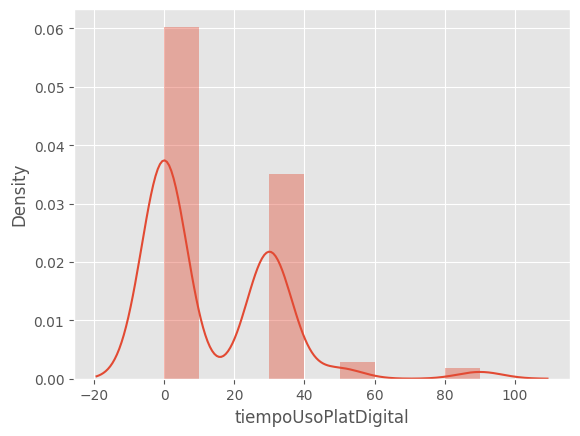

In [12]:
mapping = {'1 a 2 años': 0, '3 a 4 años, Nequi': 10, 'Menos de 1 año': 30, '5 a 6 años':50, '7 o más años':90}

data3 = data.copy()

data3['tiempoUsoPlatDigital'] = data3['tiempoUsoPlatDigital'].map(mapping)

sns.distplot(data3.tiempoUsoPlatDigital)

## Motivo de Uso de la Plataforma Digital

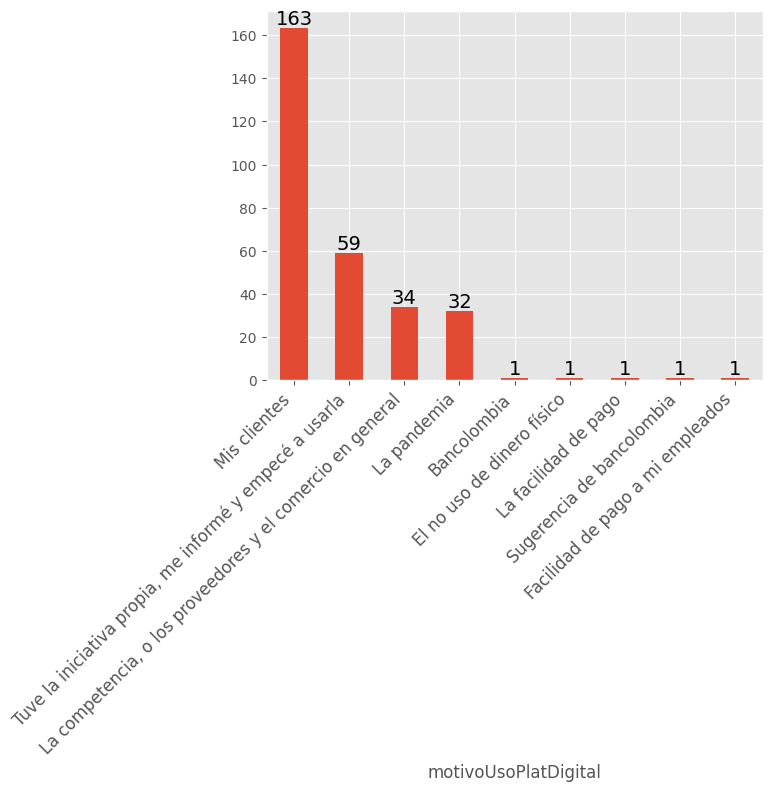

In [13]:
counts = pd.Series(data['motivoUsoPlatDigital']).value_counts()
ax = counts.plot(kind='bar')

for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

<Axes: xlabel='motivoUsoPlatDigital', ylabel='Density'>

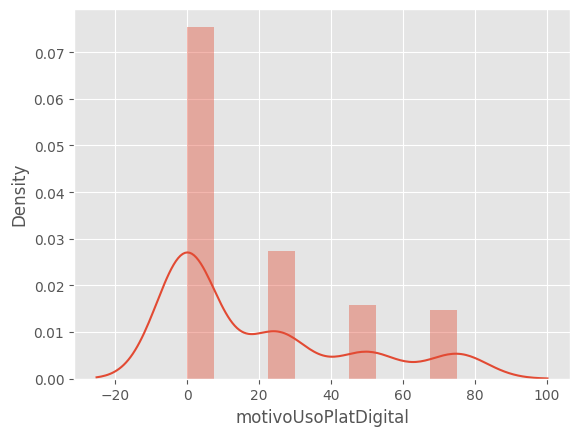

In [14]:
mapping = {'Mis clientes': 0, 'Tuve la iniciativa propia, me informé y empecé a usarla': 25, 'La competencia, o los proveedores y el comercio en general':50, 'La pandemia':75}

data3 = data.copy()

data3['motivoUsoPlatDigital'] = data3['motivoUsoPlatDigital'].map(mapping)

sns.distplot(data3.motivoUsoPlatDigital)

## Dificultad de Uso de la Plataforma Digital

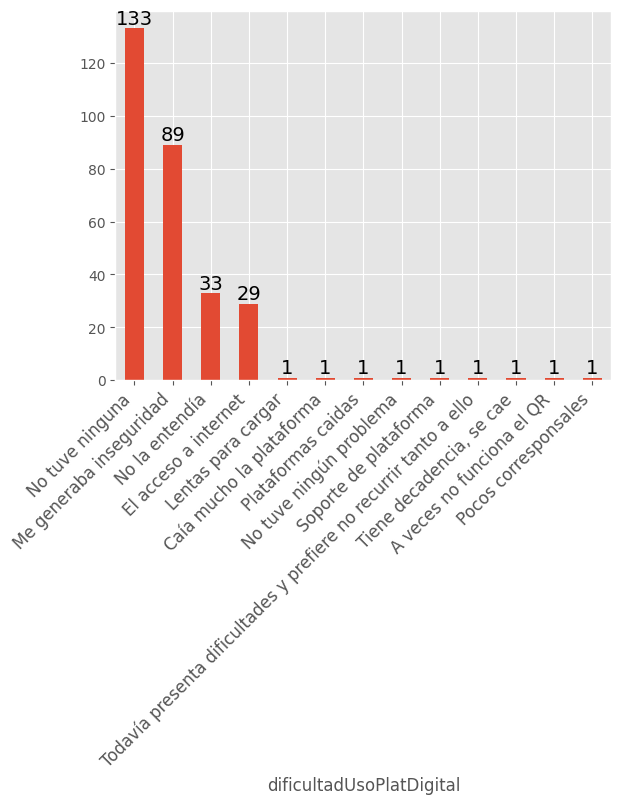

In [15]:
counts = pd.Series(data['dificultadUsoPlatDigital']).value_counts()
ax = counts.plot(kind='bar')

for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

<Axes: xlabel='dificultadUsoPlatDigital', ylabel='Density'>

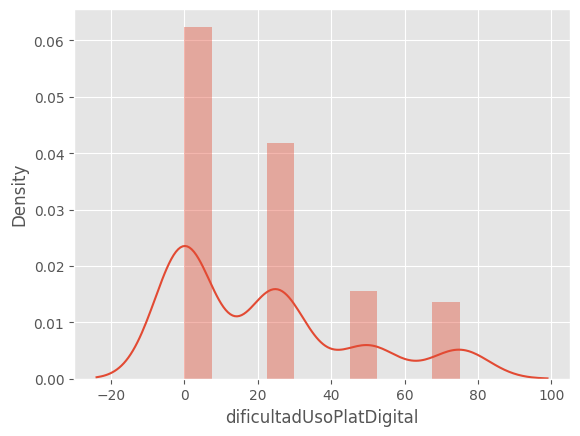

In [16]:
mapping = {'No tuve ninguna': 0, 'Me generaba inseguridad': 25, 'No la entendía':50, 'El acceso a internet':75}

data3 = data.copy()

data3['dificultadUsoPlatDigital'] = data3['dificultadUsoPlatDigital'].map(mapping)

sns.distplot(data3.dificultadUsoPlatDigital)

## Riesgo de Uso de la Plataforma Digital

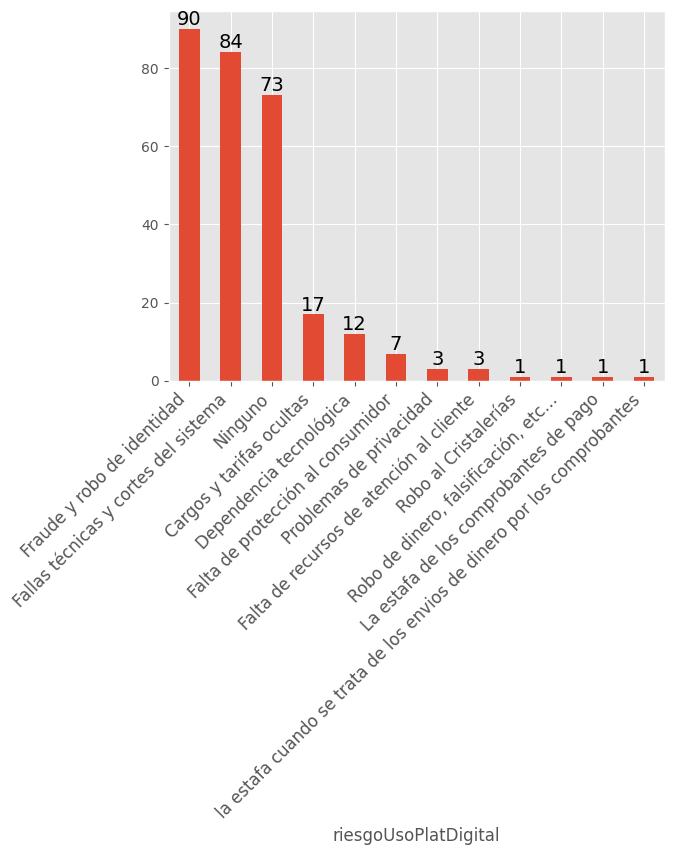

In [17]:
counts = pd.Series(data['riesgoUsoPlatDigital']).value_counts()
ax = counts.plot(kind='bar')

for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

## Inconveniente de Uso de Plataformas

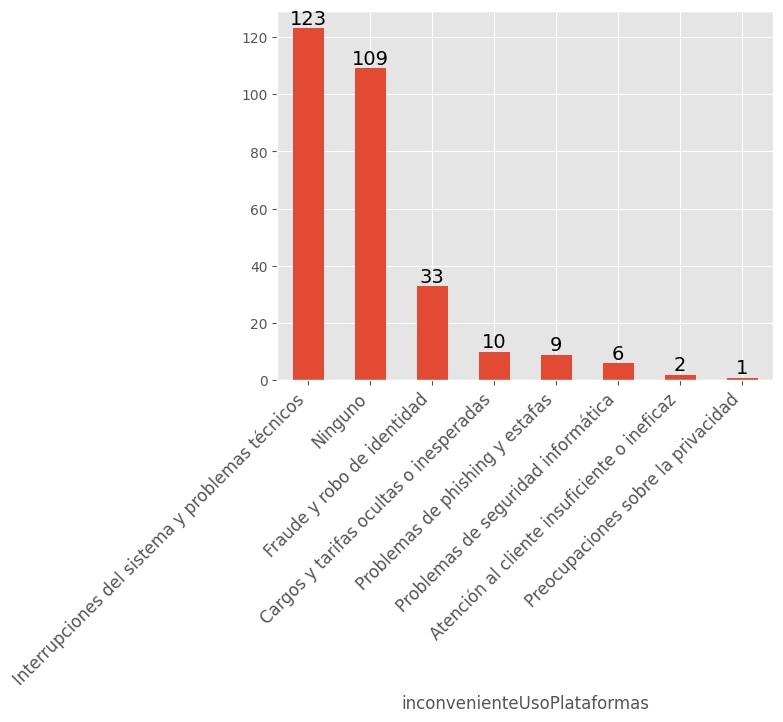

In [18]:
counts = pd.Series(data['inconvenienteUsoPlataformas']).value_counts()
ax = counts.plot(kind='bar')

for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

## Ventas Mensuales Plataformas Digitales

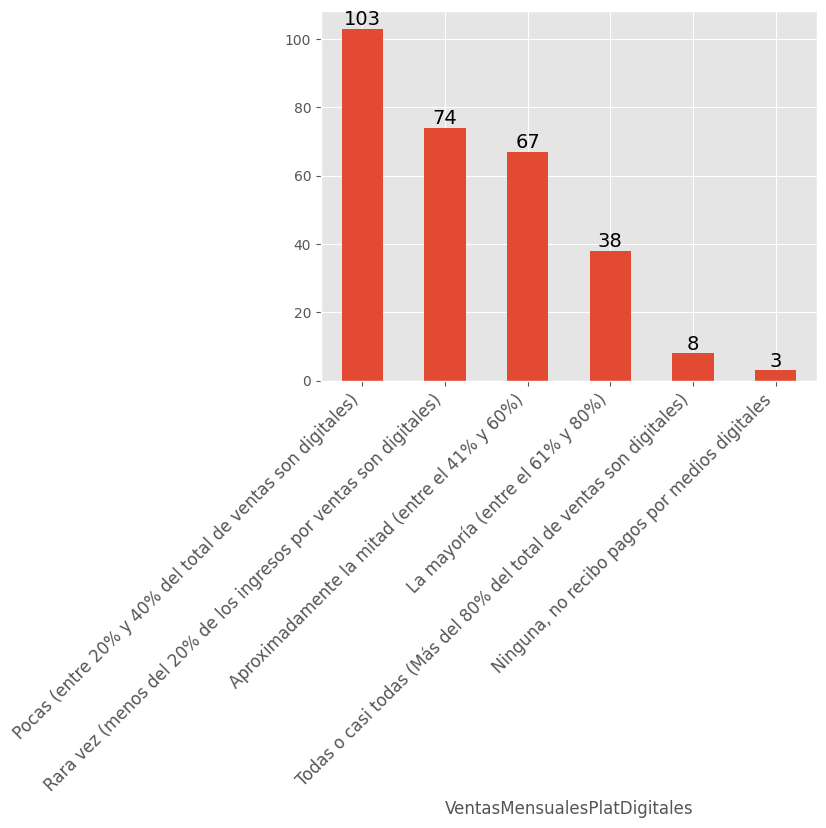

In [19]:
counts = pd.Series(data['VentasMensualesPlatDigitales']).value_counts()
ax = counts.plot(kind='bar')

for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

## Impacto de Crecimiento en la Empresa

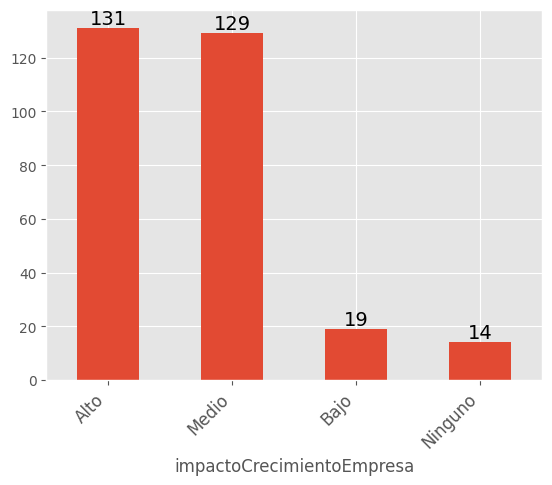

In [20]:
counts = pd.Series(data['impactoCrecimientoEmpresa']).value_counts()
ax = counts.plot(kind='bar')

for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

<Axes: xlabel='impactoCrecimientoEmpresa', ylabel='Density'>

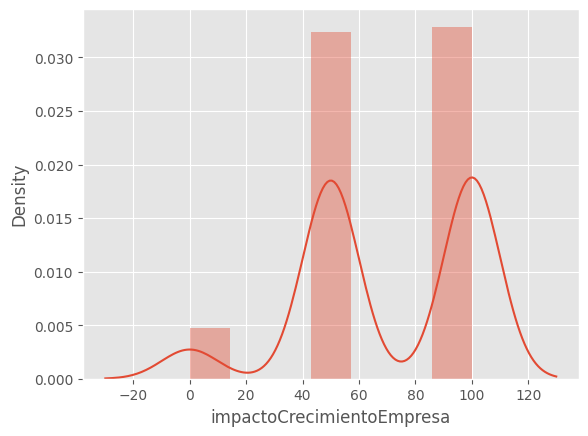

In [21]:
mapping = {'Bajo': 0, 'Medio': 50, 'Alto': 100}

data2 = data.copy()

data2['impactoCrecimientoEmpresa'] = data2['impactoCrecimientoEmpresa'].map(mapping)

sns.distplot(data2.impactoCrecimientoEmpresa)

## Impacto de Utilidad en la Empresa

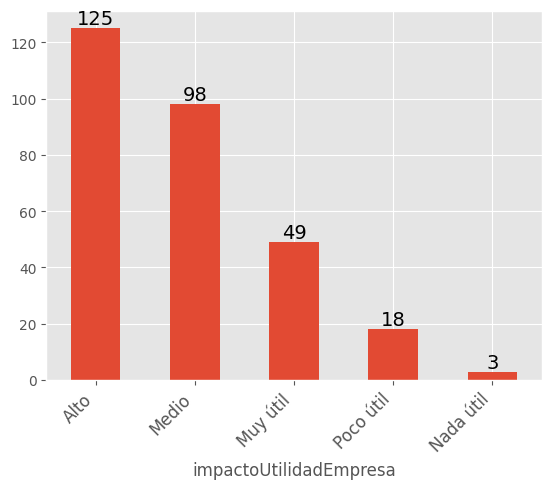

In [22]:
counts = pd.Series(data['impactoUtilidadEmpresa']).value_counts()
ax = counts.plot(kind='bar')

for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

<Axes: xlabel='impactoUtilidadEmpresa', ylabel='Density'>

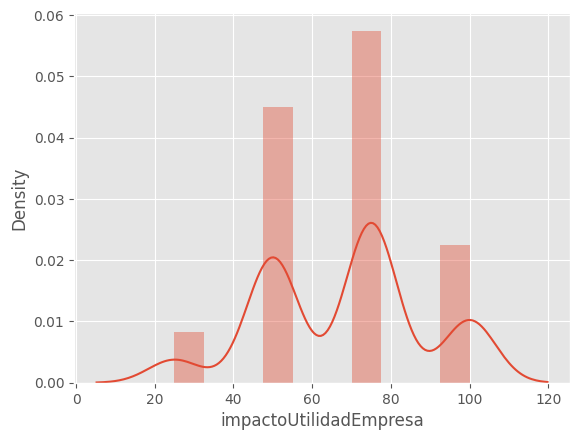

In [23]:
mapping = {'Poco útil': 25, 'Medio': 50, 'Alto': 75, 'Muy útil':100}

data2 = data.copy()

data2['impactoUtilidadEmpresa'] = data2['impactoUtilidadEmpresa'].map(mapping)

sns.distplot(data2.impactoUtilidadEmpresa)

## Impacto de Ventas en la empresa

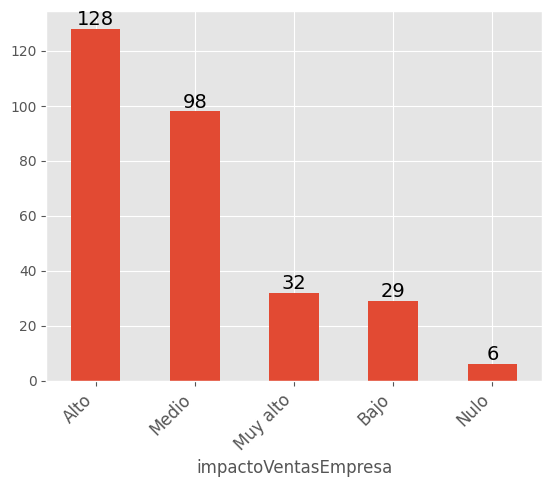

In [24]:
counts = pd.Series(data['impactoVentasEmpresa']).value_counts()
ax = counts.plot(kind='bar')

for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

<Axes: xlabel='impactoVentasEmpresa', ylabel='Density'>

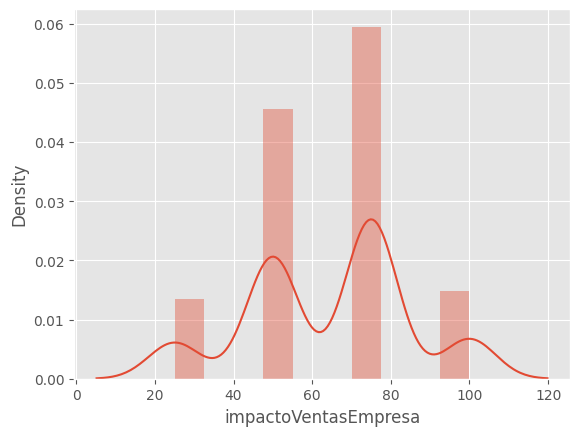

In [25]:
mapping = {'Bajo': 25, 'Medio': 50, 'Alto': 75, 'Muy alto':100}

data2 = data.copy()

data2['impactoVentasEmpresa'] = data2['impactoVentasEmpresa'].map(mapping)

sns.distplot(data2.impactoVentasEmpresa)

## Beneficios en Uso de Plataformas Digitales

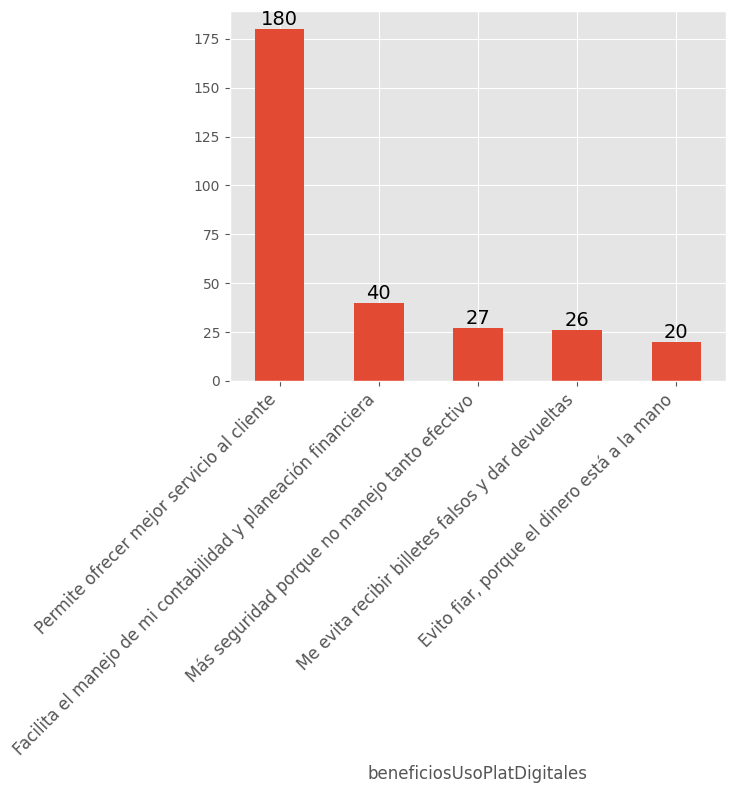

In [26]:
counts = pd.Series(data['beneficiosUsoPlatDigitales']).value_counts()
ax = counts.plot(kind='bar')

for index, value in enumerate(counts):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.show()

# Comprobando si existen valores nulos

In [27]:
print(data.isnull().values.any())

False


In [28]:
data.isnull().sum()

numEmpleados                    0
plataformaDigital               0
tiempoUsoPlatDigital            0
motivoUsoPlatDigital            0
dificultadUsoPlatDigital        0
riesgoUsoPlatDigital            0
inconvenienteUsoPlataformas     0
VentasMensualesPlatDigitales    0
impactoCrecimientoEmpresa       0
impactoUtilidadEmpresa          0
impactoVentasEmpresa            0
beneficiosUsoPlatDigitales      0
dtype: int64

## Comprobando valores unicos por columna



In [29]:
data['plataformaDigital'].unique()

array(['Nequi', 'Daviplata, Nequi', 'Daviplata, Nequi, Rappi Pay',
       'Daviplata, Nequi, Dale', 'Daviplata, Nequi, Movii ', 'Daviplata',
       'Daviplata, Nequi, Dale, Rappi Pay',
       'Daviplata, Nequi, Dale, Rappi Pay, Uala  Movii ',
       'Daviplata, Nequi, Dale, Uala: Permite su uso como tarjeta débito internacional',
       'Nequi, Movii '], dtype=object)

In [30]:
data['plataformaDigital'].value_counts()

plataformaDigital
Nequi                                                                             173
Daviplata, Nequi                                                                  102
Daviplata, Nequi, Rappi Pay                                                         5
Daviplata                                                                           5
Daviplata, Nequi, Dale                                                              2
Daviplata, Nequi, Movii                                                             2
Daviplata, Nequi, Dale, Rappi Pay                                                   1
Daviplata, Nequi, Dale, Rappi Pay, Uala  Movii                                      1
Daviplata, Nequi, Dale, Uala: Permite su uso como tarjeta débito internacional      1
Nequi, Movii                                                                        1
Name: count, dtype: int64

In [31]:
data.nunique()

numEmpleados                     5
plataformaDigital               10
tiempoUsoPlatDigital             5
motivoUsoPlatDigital             9
dificultadUsoPlatDigital        13
riesgoUsoPlatDigital            12
inconvenienteUsoPlataformas      8
VentasMensualesPlatDigitales     6
impactoCrecimientoEmpresa        4
impactoUtilidadEmpresa           5
impactoVentasEmpresa             5
beneficiosUsoPlatDigitales       5
dtype: int64

## 3 Limpiando los datos
Antes de comenzar, vamos a recuperar el conjunto de datos limpio y vamos a separar las etiquetas del resto de los datos, no necesariamente queremos aplicar las mismas transformaciones en ambos conjuntos.

In [32]:
# Separamos las características de entrada de la característica de salida

# X_train = train_set.drop("VentasMensualesPlatDigitales", axis=1)
# X_train = train_set.copy()
X_train = data.copy()
# y_train = train_set["VentasMensualesPlatDigitales"].copy()

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   numEmpleados                  293 non-null    object
 1   plataformaDigital             293 non-null    object
 2   tiempoUsoPlatDigital          293 non-null    object
 3   motivoUsoPlatDigital          293 non-null    object
 4   dificultadUsoPlatDigital      293 non-null    object
 5   riesgoUsoPlatDigital          293 non-null    object
 6   inconvenienteUsoPlataformas   293 non-null    object
 7   VentasMensualesPlatDigitales  293 non-null    object
 8   impactoCrecimientoEmpresa     293 non-null    object
 9   impactoUtilidadEmpresa        293 non-null    object
 10  impactoVentasEmpresa          293 non-null    object
 11  beneficiosUsoPlatDigitales    293 non-null    object
dtypes: object(12)
memory usage: 27.6+ KB


## Ordinal Encoding

In [34]:
from sklearn.preprocessing import OrdinalEncoder

impactoCrecimientoEmpresa = X_train[['impactoCrecimientoEmpresa']]

ordinal_encoder = OrdinalEncoder(categories=[['Ninguno', 'Bajo', 'Medio', 'Alto']])

impactoCrecimientoEmpresa_encoded = ordinal_encoder.fit_transform(impactoCrecimientoEmpresa.values.reshape(-1, 1))

impactoCrecimientoEmpresa_encoded_df = pd.DataFrame(impactoCrecimientoEmpresa_encoded, columns=['impactoCrecimientoEmpresa_encoded'])

In [35]:
impactoUtilidadEmpresa = X_train[['impactoUtilidadEmpresa']]
ordinal_encoder = OrdinalEncoder(categories=[['Nada útil', 'Poco útil', 'Medio', 'Alto', 'Muy útil']])

impactoUtilidadEmpresa_enconded = ordinal_encoder.fit_transform(impactoUtilidadEmpresa.values.reshape(-1, 1))

impactoUtilidadEmpresa_enconded_df = pd.DataFrame(impactoUtilidadEmpresa_enconded, columns=['impactoUtilidadEmpresa_enconded'])

In [36]:
impactoVentasEmpresa = X_train[['impactoVentasEmpresa']]
ordinal_encoder = OrdinalEncoder(categories=[['Nulo', 'Bajo', 'Medio', 'Alto', 'Muy alto']])

impactoVentasEmpresa_enconded = ordinal_encoder.fit_transform(impactoVentasEmpresa.values.reshape(-1, 1))

impactoVentasEmpresa_enconded_df = pd.DataFrame(impactoVentasEmpresa_enconded, columns=['impactoVentasEmpresa'])

In [37]:
numEmpleados = X_train[['numEmpleados']]
ordinal_encoder = OrdinalEncoder(categories=[['1 o 2 empleados', '3 o 4 empleados', '5 o 6 empleados', '7 o 8 empleados', '9 empleados o más']])

numEmpleados_enconded = ordinal_encoder.fit_transform(numEmpleados.values.reshape(-1, 1))

numEmpleados_enconded_df = pd.DataFrame(numEmpleados_enconded, columns=['numEmpleados'])

In [38]:
tiempoUsoPlatDigital = X_train[['tiempoUsoPlatDigital']]
ordinal_encoder = OrdinalEncoder(categories=[['Menos de 1 año', '1 a 2 años', '3 a 4 años', '5 a 6 años', '7 o más años']])

tiempoUsoPlatDigital_enconded = ordinal_encoder.fit_transform(tiempoUsoPlatDigital.values.reshape(-1, 1))

tiempoUsoPlatDigital_enconded_df = pd.DataFrame(tiempoUsoPlatDigital_enconded, columns=['tiempoUsoPlatDigital'])

In [39]:
VentasMensualesPlatDigitales = X_train[['VentasMensualesPlatDigitales']]
ordinal_encoder = OrdinalEncoder(categories=[['Ninguna, no recibo pagos por medios digitales', 'Rara vez (menos del 20% de los ingresos por ventas son digitales)', 'Pocas (entre 20% y 40% del total de ventas son digitales)', 'Aproximadamente la mitad (entre el 41% y 60%)', 'La mayoría (entre el 61% y 80%)', 'Todas o casi todas (Más del 80% del total de ventas son digitales)']])

VentasMensualesPlatDigitales_enconded = ordinal_encoder.fit_transform(VentasMensualesPlatDigitales.values.reshape(-1, 1))

VentasMensualesPlatDigitales_enconded_df = pd.DataFrame(VentasMensualesPlatDigitales_enconded, columns=['VentasMensualesPlatDigitales'])

## Get Dummies

In [40]:
X_train['plataformaDigital'].unique()

array(['Nequi', 'Daviplata, Nequi', 'Daviplata, Nequi, Rappi Pay',
       'Daviplata, Nequi, Dale', 'Daviplata, Nequi, Movii ', 'Daviplata',
       'Daviplata, Nequi, Dale, Rappi Pay',
       'Daviplata, Nequi, Dale, Rappi Pay, Uala  Movii ',
       'Daviplata, Nequi, Dale, Uala: Permite su uso como tarjeta débito internacional',
       'Nequi, Movii '], dtype=object)

In [41]:
X_train['riesgoUsoPlatDigital'].unique()

array(['Fallas técnicas y cortes del sistema',
       'Fraude y robo de identidad', 'Cargos y tarifas ocultas',
       'Ninguno', 'Dependencia tecnológica',
       'Falta de protección al consumidor', 'Robo al Cristalerías',
       'Problemas de privacidad',
       'Falta de recursos de atención al cliente',
       'Robo de dinero, falsificación, etc…',
       'La estafa de los comprobantes de pago',
       'la estafa cuando se trata de los envios de dinero por los comprobantes'],
      dtype=object)

In [42]:
#Especificando un prefijo distinto para cada grupo de columnas:

X_train_dun = pd.get_dummies(X_train[["plataformaDigital", "motivoUsoPlatDigital",
                                      "dificultadUsoPlatDigital", "riesgoUsoPlatDigital", "inconvenienteUsoPlataformas",
                                      "beneficiosUsoPlatDigitales",]],
                             prefix = ["PlatDig", "MotivoUso",
                                      "DificultadUso", "RiesgoUso", "InconvenienteUso",
                                      "BeneficiosUso",]).astype(int)

X_train_dun.head()

PlatDig_Daviplata  PlatDig_Daviplata, Nequi  \
0                  0                         0   
1                  0                         1   
2                  0                         1   
3                  0                         0   
4                  0                         0   

   PlatDig_Daviplata, Nequi, Dale  PlatDig_Daviplata, Nequi, Dale, Rappi Pay  \
0                               0                                          0   
1                               0                                          0   
2                               0                                          0   
3                               0                                          0   
4                               0                                          0   

   PlatDig_Daviplata, Nequi, Dale, Rappi Pay, Uala  Movii   \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   PlatDig_Daviplata, Nequi, Dale, Uala: Permite su uso como tarjeta débito internacional  \
0                                                  0                                        
1                                                  0                                        
2                                                  0                                        
3                                                  0                                        
4                                                  0                                        

   PlatDig_Daviplata, Nequi, Movii   PlatDig_Daviplata, Nequi, Rappi Pay  \
0                                 0                                    0   
1                                 0                                    0   
2                                 0                                    0   
3                                 0                                    0   
4                                 0                                    0   

   PlatDig_Nequi  PlatDig_Nequi, Movii   ...  \
0              1                      0  ...   
1              0                      0  ...   
2              0                      0  ...   
3              1                      0  ...   
4              1                      0  ...   

   InconvenienteUso_Interrupciones del sistema y problemas técnicos  \
0                                                  0                  
1                                                  1                  
2                                                  0                  
3                                                  0                  
4                                                  1                  

   InconvenienteUso_Ninguno  \
0                         0   
1                         0   
2                         0   
3                         1   
4                         0   

   InconvenienteUso_Preocupaciones sobre la privacidad  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   InconvenienteUso_Problemas de phishing y estafas  \
0                                                 1   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   InconvenienteUso_Problemas de seguridad informática  \
0                                                  0     
1                                                  0     
2                                                  0     
3                

In [43]:
impactoCrecimientoEmpresa_encoded_df.reset_index(drop=True, inplace=True)
X_train_dun.reset_index(drop=True, inplace=True)

df1 = pd.concat([impactoCrecimientoEmpresa_encoded_df, X_train_dun], axis=1, join="inner")

In [44]:
impactoUtilidadEmpresa_enconded_df.reset_index(drop=True, inplace=True)
df1.reset_index(drop=True, inplace=True)

df2 = pd.concat([impactoUtilidadEmpresa_enconded_df, df1], axis=1, join="inner")

In [45]:
impactoVentasEmpresa_enconded_df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

df3 = pd.concat([impactoVentasEmpresa_enconded_df, df2], axis=1, join="inner")

In [46]:
impactoVentasEmpresa_enconded_df.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)

df4 = pd.concat([numEmpleados_enconded_df, df3], axis=1, join="inner")

In [47]:
impactoVentasEmpresa_enconded_df.reset_index(drop=True, inplace=True)
df4.reset_index(drop=True, inplace=True)

df5 = pd.concat([tiempoUsoPlatDigital_enconded_df, df4], axis=1, join="inner")

In [48]:
impactoVentasEmpresa_enconded_df.reset_index(drop=True, inplace=True)
df5.reset_index(drop=True, inplace=True)

df_final = pd.concat([VentasMensualesPlatDigitales_enconded_df, df5], axis=1, join="inner")

In [49]:
df_final.astype(int)

VentasMensualesPlatDigitales  tiempoUsoPlatDigital  numEmpleados  \
0                               3                     1             1   
1                               2                     1             1   
2                               2                     1             3   
3                               1                     1             0   
4                               2                     1             1   
..                            ...                   ...           ...   
288                             4                     0             0   
289                             4                     2             3   
290                             1                     4             1   
291                             2                     0             0   
292                             3                     1             0   

     impactoVentasEmpresa  impactoUtilidadEmpresa_enconded  \
0                       3                                3   
1                       1                                2   
2                       2                                2   
3                       1                                2   
4                       2                                3   
..                    ...                              ...   
288                     3                                2   
289                     3                                3   
290                     3                                2   
291                     2                                2   
292                     2                                2   

     impactoCrecimientoEmpresa_encoded  PlatDig_Daviplata  \
0                                    3                  0   
1                                    2                  0   
2                                    2                  0   
3                                    2                  0   
4                                    2                  0   
..                                 ...                ...   
288                                  3                  0   
289                                  3                  0   
290                                  3                  0   
291                                  2                  0   
292                                  2                  0   

     PlatDig_Daviplata, Nequi  PlatDig_Daviplata, Nequi, Dale  \
0                           0                               0   
1                           1                               0   
2                           1                               0   
3                           0                               0   
4                           0                               0   
..                        ...                             ...   
288                         0                               0   
289                         1                               0   
290                         0                               0   
291                         0                               0   
292                         0                               0   

     PlatDig_Daviplata, Nequi, Dale, Rappi Pay  ...  \
0                                            0  ...   
1                                            0  ...   
2                                            0  ...   
3                                            0  ...   
4                                            0  ...   
..                                         ...  ...   
288                                          0  ...   
289                                          0  ...   
290                                          0  ...   
291                                          0  ...   
292                                          0  ...   

     InconvenienteUso_Interrupciones del sistema y problemas técnicos  \
0                                                    0                  
1                                                    1        

In [50]:
df_final.columns

Index(['VentasMensualesPlatDigitales', 'tiempoUsoPlatDigital', 'numEmpleados',
       'impactoVentasEmpresa', 'impactoUtilidadEmpresa_enconded',
       'impactoCrecimientoEmpresa_encoded', 'PlatDig_Daviplata',
       'PlatDig_Daviplata, Nequi', 'PlatDig_Daviplata, Nequi, Dale',
       'PlatDig_Daviplata, Nequi, Dale, Rappi Pay',
       'PlatDig_Daviplata, Nequi, Dale, Rappi Pay, Uala  Movii ',
       'PlatDig_Daviplata, Nequi, Dale, Uala: Permite su uso como tarjeta débito internacional',
       'PlatDig_Daviplata, Nequi, Movii ',
       'PlatDig_Daviplata, Nequi, Rappi Pay', 'PlatDig_Nequi',
       'PlatDig_Nequi, Movii ', 'MotivoUso_Bancolombia',
       'MotivoUso_El no uso de dinero físico',
       'MotivoUso_Facilidad de pago a mi empleados',
       'MotivoUso_La competencia, o los proveedores y el comercio en general',
       'MotivoUso_La facilidad de pago', 'MotivoUso_La pandemia',
       'MotivoUso_Mis clientes', 'MotivoUso_Sugerencia de bancolombia',
       'MotivoUso_Tuve la 

In [51]:
df_final.shape

(293, 63)

In [52]:
df_final

VentasMensualesPlatDigitales  tiempoUsoPlatDigital  numEmpleados  \
0                             3.0                   1.0           1.0   
1                             2.0                   1.0           1.0   
2                             2.0                   1.0           3.0   
3                             1.0                   1.0           0.0   
4                             2.0                   1.0           1.0   
..                            ...                   ...           ...   
288                           4.0                   0.0           0.0   
289                           4.0                   2.0           3.0   
290                           1.0                   4.0           1.0   
291                           2.0                   0.0           0.0   
292                           3.0                   1.0           0.0   

     impactoVentasEmpresa  impactoUtilidadEmpresa_enconded  \
0                     3.0                              3.0   
1                     1.0                              2.0   
2                     2.0                              2.0   
3                     1.0                              2.0   
4                     2.0                              3.0   
..                    ...                              ...   
288                   3.0                              2.0   
289                   3.0                              3.0   
290                   3.0                              2.0   
291                   2.0                              2.0   
292                   2.0                              2.0   

     impactoCrecimientoEmpresa_encoded  PlatDig_Daviplata  \
0                                  3.0                  0   
1                                  2.0                  0   
2                                  2.0                  0   
3                                  2.0                  0   
4                                  2.0                  0   
..                                 ...                ...   
288                                3.0                  0   
289                                3.0                  0   
290                                3.0                  0   
291                                2.0                  0   
292                                2.0                  0   

     PlatDig_Daviplata, Nequi  PlatDig_Daviplata, Nequi, Dale  \
0                           0                               0   
1                           1                               0   
2                           1                               0   
3                           0                               0   
4                           0                               0   
..                        ...                             ...   
288                         0                               0   
289                         1                               0   
290                         0                               0   
291                         0                               0   
292                         0                               0   

     PlatDig_Daviplata, Nequi, Dale, Rappi Pay  ...  \
0                                            0  ...   
1                                            0  ...   
2                                            0  ...   
3                                            0  ...   
4                                            0  ...   
..                                         ...  ...   
288                                          0  ...   
289                                          0  ...   
290                                          0  ...   
291                                          0  ...   
292                                          0  ...   

     InconvenienteUso_Interrupciones del sistema y problemas técnicos  \
0                                                    0                  
1                                                    1        

## 5. Escalado del conjunto de datos_caso_1_todo el train

In [53]:
from sklearn import preprocessing
df_value = df_final.copy().values
min_max_scaler = preprocessing.MinMaxScaler()
micronegocios_scaled = min_max_scaler.fit_transform(df_value)
micronegocio_df_scaled = pd.DataFrame(micronegocios_scaled, columns=df_final.columns)
micronegocio_df_scaled

VentasMensualesPlatDigitales  tiempoUsoPlatDigital  numEmpleados  \
0                             0.6                  0.25          0.25   
1                             0.4                  0.25          0.25   
2                             0.4                  0.25          0.75   
3                             0.2                  0.25          0.00   
4                             0.4                  0.25          0.25   
..                            ...                   ...           ...   
288                           0.8                  0.00          0.00   
289                           0.8                  0.50          0.75   
290                           0.2                  1.00          0.25   
291                           0.4                  0.00          0.00   
292                           0.6                  0.25          0.00   

     impactoVentasEmpresa  impactoUtilidadEmpresa_enconded  \
0                    0.75                             0.75   
1                    0.25                             0.50   
2                    0.50                             0.50   
3                    0.25                             0.50   
4                    0.50                             0.75   
..                    ...                              ...   
288                  0.75                             0.50   
289                  0.75                             0.75   
290                  0.75                             0.50   
291                  0.50                             0.50   
292                  0.50                             0.50   

     impactoCrecimientoEmpresa_encoded  PlatDig_Daviplata  \
0                             1.000000                0.0   
1                             0.666667                0.0   
2                             0.666667                0.0   
3                             0.666667                0.0   
4                             0.666667                0.0   
..                                 ...                ...   
288                           1.000000                0.0   
289                           1.000000                0.0   
290                           1.000000                0.0   
291                           0.666667                0.0   
292                           0.666667                0.0   

     PlatDig_Daviplata, Nequi  PlatDig_Daviplata, Nequi, Dale  \
0                         0.0                             0.0   
1                         1.0                             0.0   
2                         1.0                             0.0   
3                         0.0                             0.0   
4                         0.0                             0.0   
..                        ...                             ...   
288                       0.0                             0.0   
289                       1.0                             0.0   
290                       0.0                             0.0   
291                       0.0                             0.0   
292                       0.0                             0.0   

     PlatDig_Daviplata, Nequi, Dale, Rappi Pay  ...  \
0                                          0.0  ...   
1                                          0.0  ...   
2                                          0.0  ...   
3                                          0.0  ...   
4                                          0.0  ...   
..                                         ...  ...   
288                                        0.0  ...   
289                                        0.0  ...   
290                                        0.0  ...   
291                                        0.0  ...   
292                                        0.0  ...   

     InconvenienteUso_Interrupciones del sistema y problemas técnicos  \
0                                                  0.0                  
1                                                  1.0        

## Podemos reconstruir el DataFrame original con los nuevos valores y visualizar las primeras muestras:

In [54]:
# transformed_micronegocios  = pd.DataFrame(transformed_micronegocios )
transformed_micronegocios = micronegocio_df_scaled.copy()
transformed_micronegocios.columns = df_final.columns

In [55]:
transformed_micronegocios.head()

VentasMensualesPlatDigitales  tiempoUsoPlatDigital  numEmpleados  \
0                           0.6                  0.25          0.25   
1                           0.4                  0.25          0.25   
2                           0.4                  0.25          0.75   
3                           0.2                  0.25          0.00   
4                           0.4                  0.25          0.25   

   impactoVentasEmpresa  impactoUtilidadEmpresa_enconded  \
0                  0.75                             0.75   
1                  0.25                             0.50   
2                  0.50                             0.50   
3                  0.25                             0.50   
4                  0.50                             0.75   

   impactoCrecimientoEmpresa_encoded  PlatDig_Daviplata  \
0                           1.000000                0.0   
1                           0.666667                0.0   
2                           0.666667                0.0   
3                           0.666667                0.0   
4                           0.666667                0.0   

   PlatDig_Daviplata, Nequi  PlatDig_Daviplata, Nequi, Dale  \
0                       0.0                             0.0   
1                       1.0                             0.0   
2                       1.0                             0.0   
3                       0.0                             0.0   
4                       0.0                             0.0   

   PlatDig_Daviplata, Nequi, Dale, Rappi Pay  ...  \
0                                        0.0  ...   
1                                        0.0  ...   
2                                        0.0  ...   
3                                        0.0  ...   
4                                        0.0  ...   

   InconvenienteUso_Interrupciones del sistema y problemas técnicos  \
0                                                0.0                  
1                                                1.0                  
2                                                0.0                  
3                                                0.0                  
4                                                1.0                  

   InconvenienteUso_Ninguno  \
0                       0.0   
1                       0.0   
2                       0.0   
3                       1.0   
4                       0.0   

   InconvenienteUso_Preocupaciones sobre la privacidad  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   InconvenienteUso_Problemas de phishing y estafas  \
0                                               1.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   InconvenienteUso_Problemas de seguridad informática  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   BeneficiosUso_Evito fiar, porque el dinero está a la mano  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   BeneficiosUso_Facilita el manejo de mi contabilidad y planeación financiera  \
0                                                0.0

In [56]:
y_train = df_final["VentasMensualesPlatDigitales"].copy()

## 6. Selección y Reducción de caracteristicas mediante Random Forests

In [57]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(transformed_micronegocios, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

## 6.1. Importancia de las características

In [58]:
clf_rnd.feature_importances_

array([4.24114297e-01, 4.27714236e-02, 3.63249049e-02, 4.86429274e-02,
       5.14708361e-02, 4.40763471e-02, 1.40906449e-03, 1.44281546e-02,
       2.17081972e-03, 6.69408416e-04, 9.04146943e-04, 1.52675902e-03,
       1.74201260e-03, 2.10434856e-03, 2.04301983e-02, 9.94151301e-04,
       5.65949922e-04, 2.08379249e-03, 2.49257234e-04, 9.88803674e-03,
       1.02992232e-03, 1.17374424e-02, 1.57256129e-02, 2.06667509e-04,
       1.82905760e-02, 1.22472897e-03, 1.14564725e-03, 7.06631751e-03,
       1.23473068e-03, 1.55522116e-02, 1.06133212e-02, 1.47402276e-02,
       9.45267772e-05, 4.80113827e-04, 6.10273656e-04, 3.40711903e-04,
       1.21147671e-03, 1.48948546e-03, 6.46752164e-03, 6.84187689e-03,
       1.70188828e-02, 5.15856563e-03, 2.45045733e-03, 1.67342686e-02,
       1.06916318e-03, 1.04024457e-02, 1.64510068e-03, 7.87849904e-04,
       5.15062223e-04, 2.89434596e-03, 1.61977959e-03, 5.39780952e-03,
       9.05422938e-03, 1.61773720e-02, 1.46000699e-02, 4.97972339e-04,
      

In [59]:
# Podemos extraer que características son más importantes para la correcta clasificación de los datos
feature_importances = {name: score for name, score in zip(list(transformed_micronegocios), clf_rnd.feature_importances_)}

In [60]:
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(20)

VentasMensualesPlatDigitales                                                   0.424114
impactoUtilidadEmpresa_enconded                                                0.051471
impactoVentasEmpresa                                                           0.048643
impactoCrecimientoEmpresa_encoded                                              0.044076
tiempoUsoPlatDigital                                                           0.042771
numEmpleados                                                                   0.036325
PlatDig_Nequi                                                                  0.020430
MotivoUso_Tuve la iniciativa propia, me informé y empecé a usarla              0.018291
RiesgoUso_Fallas técnicas y cortes del sistema                                 0.017019
BeneficiosUso_Permite ofrecer mejor servicio al cliente                        0.016852
RiesgoUso_Fraude y robo de identidad                                           0.016734
BeneficiosUso_Facilita el manejo de mi contabilidad y planeación financiera    0.016212
InconvenienteUso_Interrupciones del sistema y problemas técnicos               0.016177
MotivoUso_Mis clientes                                                         0.015726
DificultadUso_Me generaba inseguridad                                          0.015552
DificultadUso_No tuve ninguna                                                  0.014740
InconvenienteUso_Ninguno                                                       0.014600
PlatDig_Daviplata, Nequi                                                       0.014428
MotivoUso_La pandemia                                                          0.011737
BeneficiosUso_Me evita recibir billetes falsos y dar devueltas                 0.011435
dtype: float64

## 6.2. Reducción del número de características

In [61]:
#Extraemos las 10 caracteristicas con mas relevancia para el algoritmo
columns = list(feature_importances_sorted.head(7).index)

In [62]:
columns

['VentasMensualesPlatDigitales',
 'impactoUtilidadEmpresa_enconded',
 'impactoVentasEmpresa',
 'impactoCrecimientoEmpresa_encoded',
 'tiempoUsoPlatDigital',
 'numEmpleados',
 'PlatDig_Nequi']

In [63]:
X_train_reduced = transformed_micronegocios[columns].copy()

In [64]:
X_train_reduced.head(10)

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
0                           0.6                             0.75   
1                           0.4                             0.50   
2                           0.4                             0.50   
3                           0.2                             0.50   
4                           0.4                             0.75   
5                           0.8                             1.00   
6                           0.2                             0.50   
7                           0.4                             0.75   
8                           0.4                             0.50   
9                           0.4                             1.00   

   impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
0                  0.75                           1.000000   
1                  0.25                           0.666667   
2                  0.50                           0.666667   
3                  0.25                           0.666667   
4                  0.50                           0.666667   
5                  1.00                           1.000000   
6                  0.50                           0.333333   
7                  0.75                           1.000000   
8                  0.50                           0.666667   
9                  0.25                           0.666667   

   tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  
0                  0.25          0.25            1.0  
1                  0.25          0.25            0.0  
2                  0.25          0.75            0.0  
3                  0.25          0.00            1.0  
4                  0.25          0.25            1.0  
5                  0.50          0.50            0.0  
6                  0.00          0.00            1.0  
7                  0.25          0.25            0.0  
8                  0.00          0.00            1.0  
9                  0.50          0.00            1.0

In [65]:
X_train_reduced.shape

(293, 7)

In [66]:
#se divide en tres subconjuntos y con stratify se manteine la propoción de columna protoclo en la proporición de los tres subconjuntos
train_set, val_set, test_set = train_val_test_split(X_train_reduced)

In [67]:
print('La longitud del training set es {} lo que representa {:.2f}%'.format(len(train_set), ((len(train_set)) * 100) / len(data)))
print('La longitud del Validation set es {} lo que representa {:.2f}%'.format(len(val_set), ((len(val_set)) * 100) / len(data)))
print('La longitud del Test set es {} lo que representa {:.2f}%'.format(len(test_set), ((len(test_set)) * 100) / len(data)))

La longitud del training set es 175 lo que representa 59.73%
La longitud del Validation set es 59 lo que representa 20.14%
La longitud del Test set es 59 lo que representa 20.14%


In [68]:
X_train_randomForest_Metrics = X_train_reduced.copy()
train_set_RFMetrics = train_set.copy()
test_set_RFMetrics = test_set.copy()

In [69]:
X_train_randomForest_Metrics

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
0                             0.6                             0.75   
1                             0.4                             0.50   
2                             0.4                             0.50   
3                             0.2                             0.50   
4                             0.4                             0.75   
..                            ...                              ...   
288                           0.8                             0.50   
289                           0.8                             0.75   
290                           0.2                             0.50   
291                           0.4                             0.50   
292                           0.6                             0.50   

     impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
0                    0.75                           1.000000   
1                    0.25                           0.666667   
2                    0.50                           0.666667   
3                    0.25                           0.666667   
4                    0.50                           0.666667   
..                    ...                                ...   
288                  0.75                           1.000000   
289                  0.75                           1.000000   
290                  0.75                           1.000000   
291                  0.50                           0.666667   
292                  0.50                           0.666667   

     tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  
0                    0.25          0.25            1.0  
1                    0.25          0.25            0.0  
2                    0.25          0.75            0.0  
3                    0.25          0.00            1.0  
4                    0.25          0.25            1.0  
..                    ...           ...            ...  
288                  0.00          0.00            1.0  
289                  0.50          0.75            0.0  
290                  1.00          0.25            1.0  
291                  0.00          0.00            1.0  
292                  0.25          0.00            1.0  

[293 rows x 7 columns]

In [70]:
train_set_RFMetrics.head(1)

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
167                           0.4                              0.5   

     impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
167                   0.5                           0.333333   

     tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  
167                   0.0           0.0            0.0

In [71]:
test_set_RFMetrics.head(1)

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
183                           0.2                             0.75   

     impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
183                  0.75                           0.666667   

     tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  
183                  0.25           0.0            0.0

## MATRIZ DE CORRELACIÓN

In [72]:
#Extraemos las 5 caracteristicas con mas relevancia para el algoritmo
columns = list(feature_importances_sorted.head(5).index)

In [73]:
X_train_reduced_matriz = transformed_micronegocios[columns].copy()

In [74]:
X_train_reduced_matriz.head(10)

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
0                           0.6                             0.75   
1                           0.4                             0.50   
2                           0.4                             0.50   
3                           0.2                             0.50   
4                           0.4                             0.75   
5                           0.8                             1.00   
6                           0.2                             0.50   
7                           0.4                             0.75   
8                           0.4                             0.50   
9                           0.4                             1.00   

   impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
0                  0.75                           1.000000   
1                  0.25                           0.666667   
2                  0.50                           0.666667   
3                  0.25                           0.666667   
4                  0.50                           0.666667   
5                  1.00                           1.000000   
6                  0.50                           0.333333   
7                  0.75                           1.000000   
8                  0.50                           0.666667   
9                  0.25                           0.666667   

   tiempoUsoPlatDigital  
0                  0.25  
1                  0.25  
2                  0.25  
3                  0.25  
4                  0.25  
5                  0.50  
6                  0.00  
7                  0.25  
8                  0.00  
9                  0.50

In [75]:
X_train_reduced_matriz.shape

(293, 5)

In [76]:
X_train_reduced_matriz.columns

Index(['VentasMensualesPlatDigitales', 'impactoUtilidadEmpresa_enconded',
       'impactoVentasEmpresa', 'impactoCrecimientoEmpresa_encoded',
       'tiempoUsoPlatDigital'],
      dtype='object')

In [77]:
X_train_reduced_matriz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   VentasMensualesPlatDigitales       293 non-null    float64
 1   impactoUtilidadEmpresa_enconded    293 non-null    float64
 2   impactoVentasEmpresa               293 non-null    float64
 3   impactoCrecimientoEmpresa_encoded  293 non-null    float64
 4   tiempoUsoPlatDigital               293 non-null    float64
dtypes: float64(5)
memory usage: 11.6 KB


## Análisis de patrones de características individuales mediante visualización

In [78]:
# ! pip install seaborn

In [79]:
#Identificamos si hay valores faltantantes
X_train_reduced_matriz.isna().sum().sort_values()

VentasMensualesPlatDigitales         0
impactoUtilidadEmpresa_enconded      0
impactoVentasEmpresa                 0
impactoCrecimientoEmpresa_encoded    0
tiempoUsoPlatDigital                 0
dtype: int64

<Axes: >

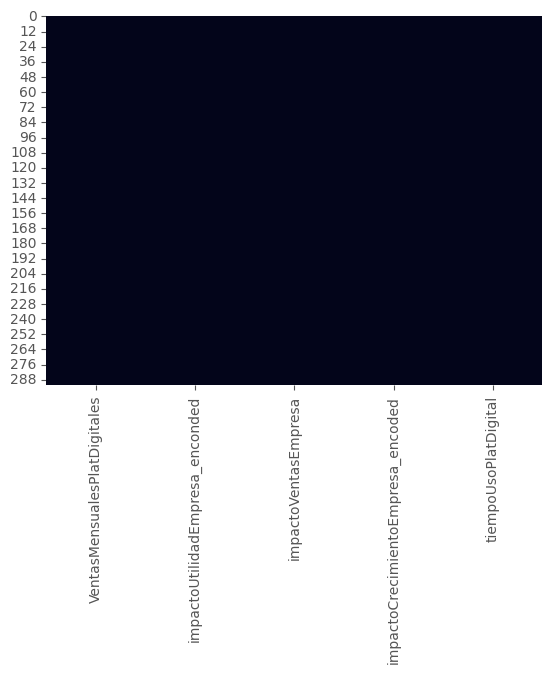

In [80]:
# Identificamos los valores faltantantes visualmente
sns.heatmap(X_train_reduced_matriz.isnull(), cbar=False)

## Hallar Correlación entre variables de tipo “int64” o “float64” utilizando el método “corr”:

In [81]:
# Selecciona solo las columnas numéricas
numeric_columns = X_train_reduced_matriz.select_dtypes(include=['float64', 'int64'])

# Calcula la correlación solo entre las columnas numéricas
correlation_matrix = numeric_columns.corr()

print(correlation_matrix)

                                   VentasMensualesPlatDigitales  \
VentasMensualesPlatDigitales                           1.000000   
impactoUtilidadEmpresa_enconded                        0.508191   
impactoVentasEmpresa                                   0.534046   
impactoCrecimientoEmpresa_encoded                      0.471046   
tiempoUsoPlatDigital                                   0.248466   

                                   impactoUtilidadEmpresa_enconded  \
VentasMensualesPlatDigitales                              0.508191   
impactoUtilidadEmpresa_enconded                           1.000000   
impactoVentasEmpresa                                      0.646627   
impactoCrecimientoEmpresa_encoded                         0.549814   
tiempoUsoPlatDigital                                      0.248080   

                                   impactoVentasEmpresa  \
VentasMensualesPlatDigitales                   0.534046   
impactoUtilidadEmpresa_enconded                0.646627   

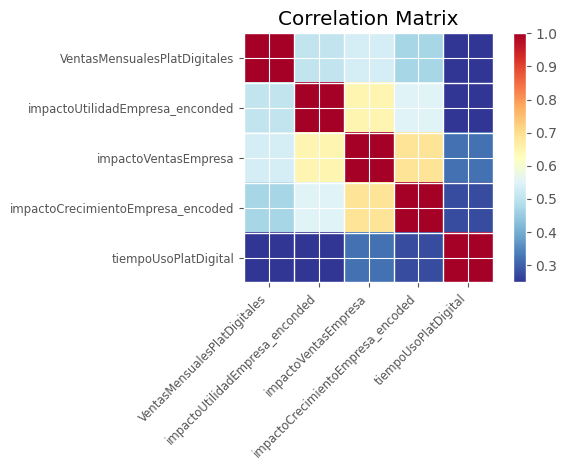

In [82]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Suponiendo que tu dataset está en un DataFrame llamado 'X_train_reduced_matriz'
# Selecciona solo las columnas numéricas
numeric_columns = X_train_reduced_matriz.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación entre las columnas numéricas
corr = numeric_columns.corr()

# Graficar la matriz de correlación
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

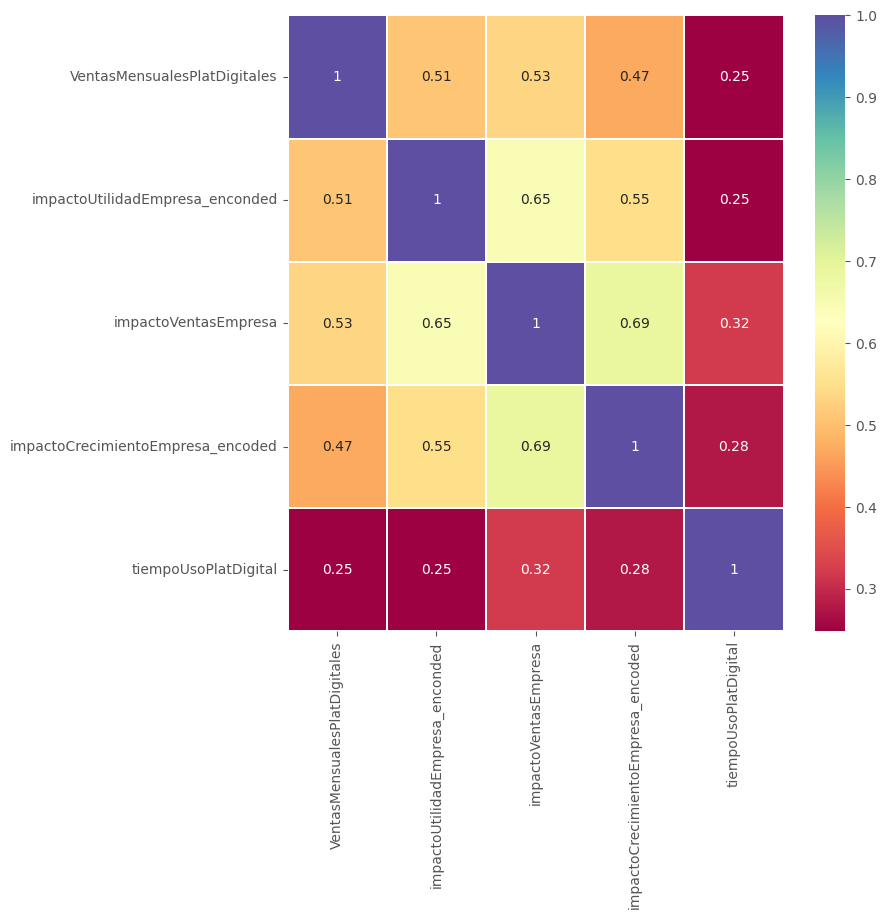

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona solo las columnas numéricas
numeric_columns = X_train_reduced_matriz.select_dtypes(include=['float64', 'int64'])

# Crear el mapa de calor de la correlación
sns.heatmap(numeric_columns.corr(), annot=True, cmap='Spectral', linewidths=0.1)

# Ajustar el tamaño de la figura
fig = plt.gcf()
fig.set_size_inches(8, 8)

# Mostrar la gráfica
plt.show()

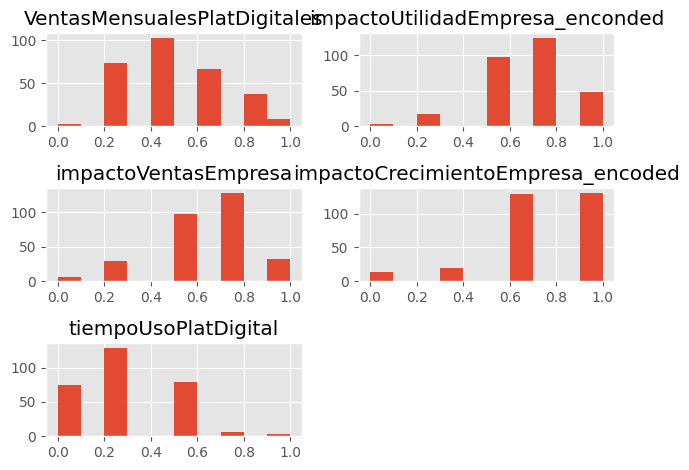

In [84]:
#visualizar la distribución de  cada variable cuantitativa usando un histograma.

# Generar histogramas
X_train_reduced_matriz.hist()
plt.tight_layout()
plt.show()

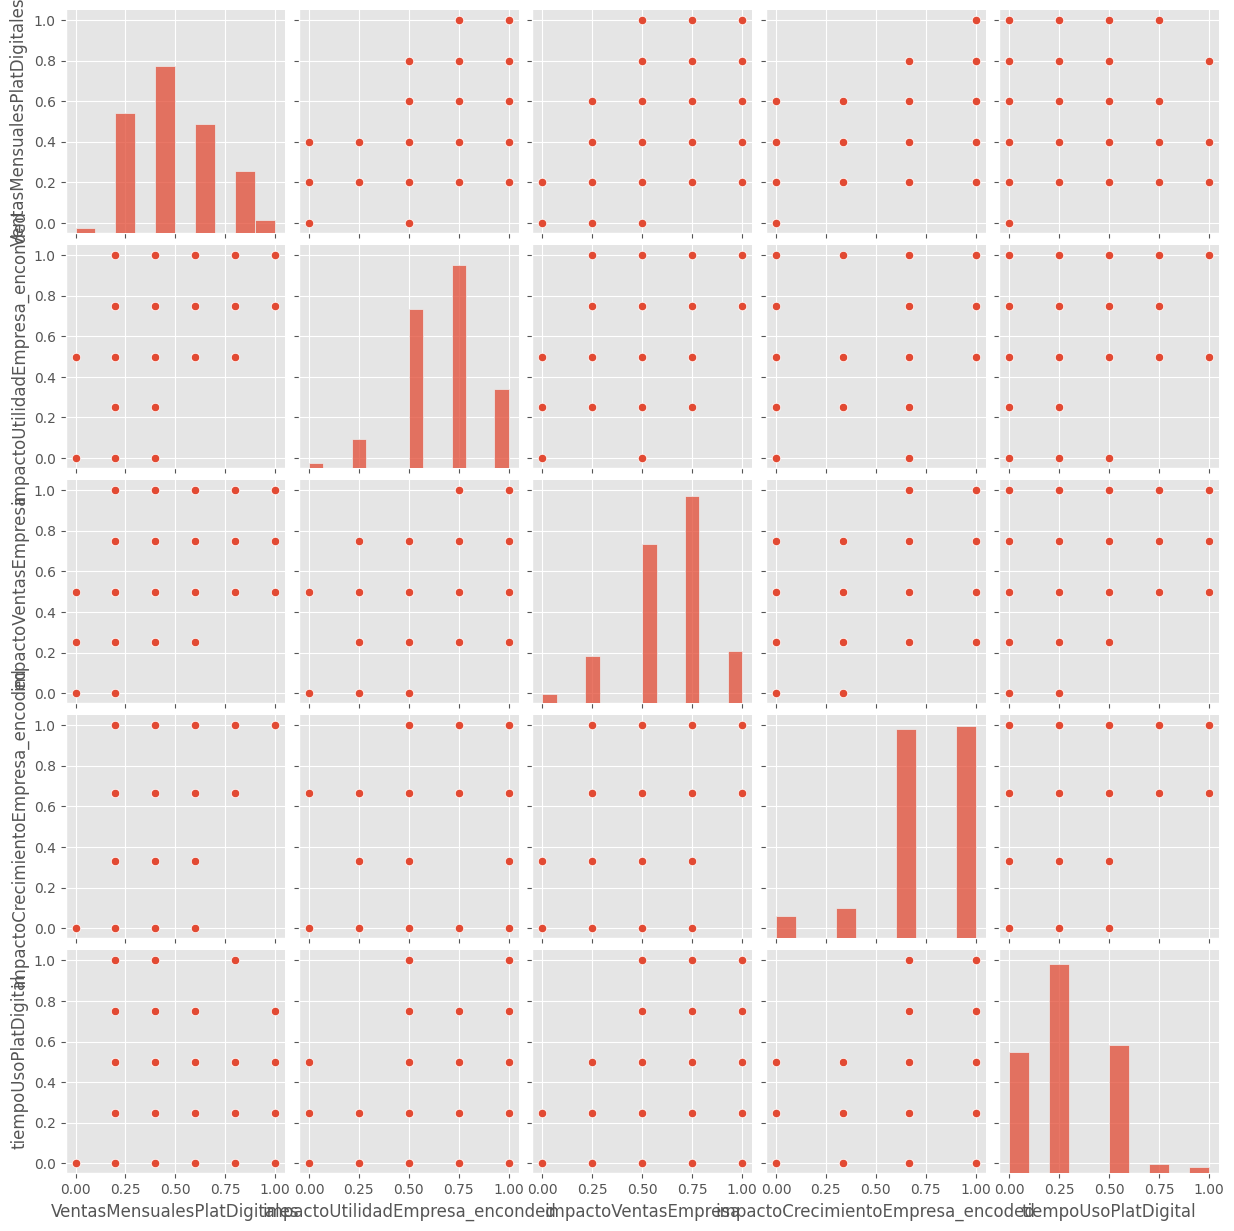

In [85]:
# Visualizar la relación entre todas las variables utilizando una matriz de diagramas de dispersión
sns.pairplot(X_train_reduced_matriz)

# CLUSTERS

## Numero Optimo de Clusters K-Means

In [86]:
X_train_reduced = train_set.copy()

In [87]:
X_train_reduced

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
167                           0.4                             0.50   
180                           0.4                             0.50   
69                            0.4                             0.75   
239                           0.4                             0.75   
2                             0.4                             0.50   
..                            ...                              ...   
188                           0.2                             0.50   
71                            0.2                             0.50   
106                           0.2                             0.25   
270                           0.8                             1.00   
102                           0.4                             0.75   

     impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
167                  0.50                           0.333333   
180                  0.25                           0.333333   
69                   1.00                           1.000000   
239                  0.50                           0.666667   
2                    0.50                           0.666667   
..                    ...                                ...   
188                  0.25                           0.000000   
71                   0.50                           0.666667   
106                  0.25                           0.000000   
270                  1.00                           1.000000   
102                  0.75                           0.666667   

     tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  
167                  0.00          0.00            0.0  
180                  0.25          0.25            0.0  
69                   0.25          0.00            0.0  
239                  0.25          0.50            1.0  
2                    0.25          0.75            0.0  
..                    ...           ...            ...  
188                  0.25          0.25            0.0  
71                   0.00          0.25            0.0  
106                  0.00          0.00            1.0  
270                  0.50          0.25            1.0  
102                  0.00          0.00            1.0  

[175 rows x 7 columns]

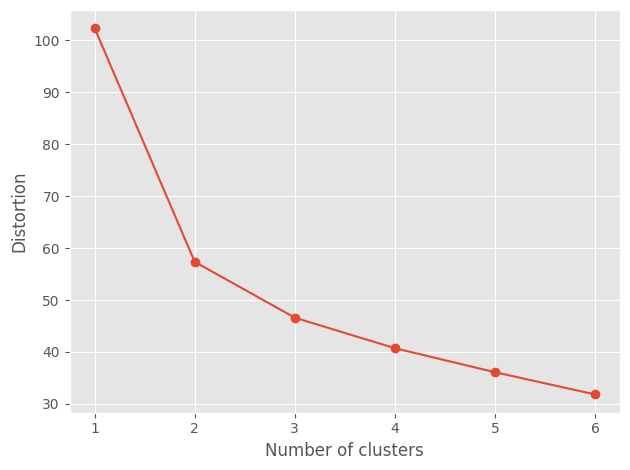

In [88]:
#1. Forma de Elbow Method for K means funete: Sebastian Raschka
distortions = []
for i in range(1, 7):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X_train_reduced)
    distortions.append(km.inertia_)
plt.plot(range(1, 7), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

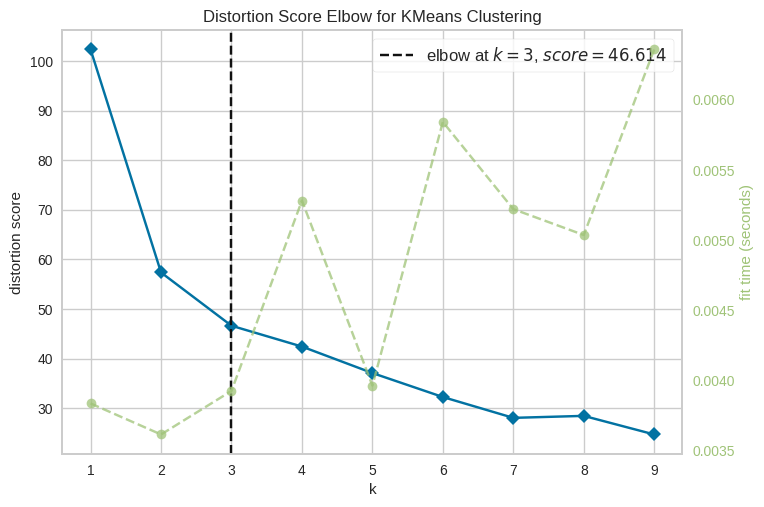

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
# 2. Forma de Elbow Method for K means- Fuente: Indraneel Dutta Baruah
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,10), timings= True)
visualizer.fit(X_train_reduced)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Cuantificacion de la calidad del agrupmaineto mediante Grafico de silueta
- Representa una medida de como estan agrupadas las muestras en los grupos.

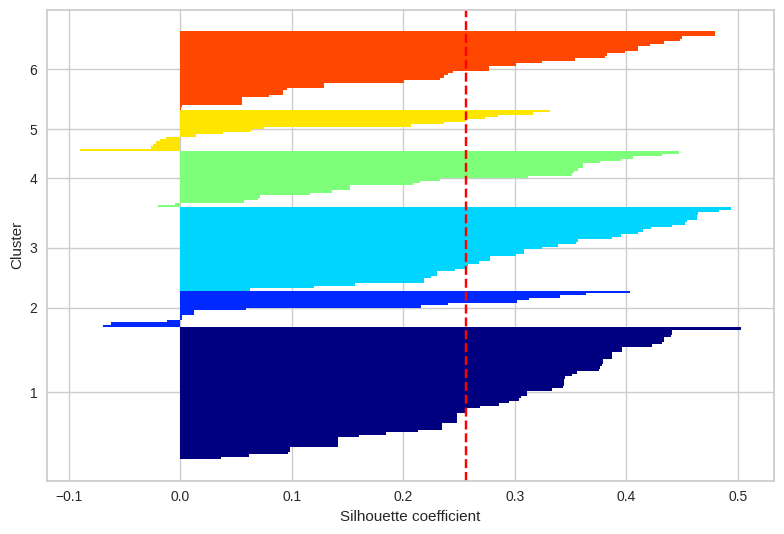

In [90]:
'''# 1. Forma de Graficos de silueta. Fuente: Sebastin Rasckka capt.11'''
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=100,
            max_iter=300,
            tol=1e-04,
            random_state=42)
y_km = km.fit_predict(X_train_reduced)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_train_reduced, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

- Mediante la inspeccion visual del grafico de silueta, podemos examinar los tamaños de los grupose identificar aquellos que comntinen outliers. Los coeficintes no se acrecan a 0 , indicador de un buen agrupamiento, hay un coefic. de silueta medio al grafico(linea roja punteada).

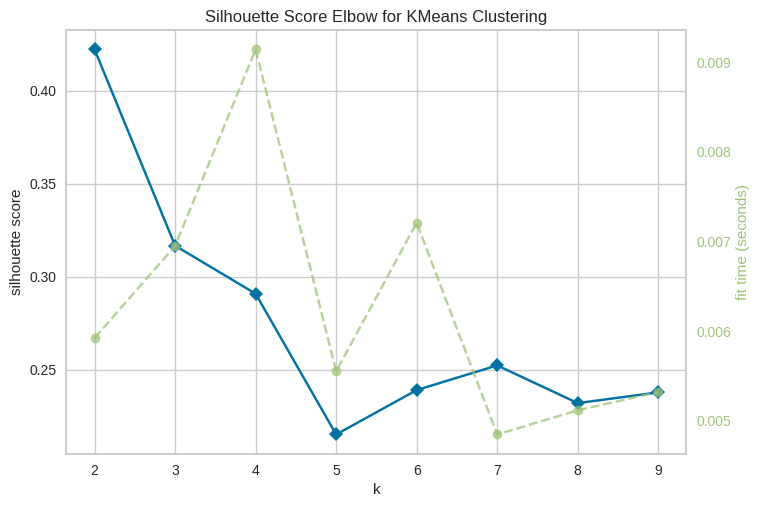

Optimal number of clusters based on silhouette score: [2]


In [91]:
# 2. Forma ed Silhouette Score for K means. Fuente: Indraneel Dutta Baruah

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(X_train_reduced)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

Optimal number of clusters based on gap statistic: [29.0]


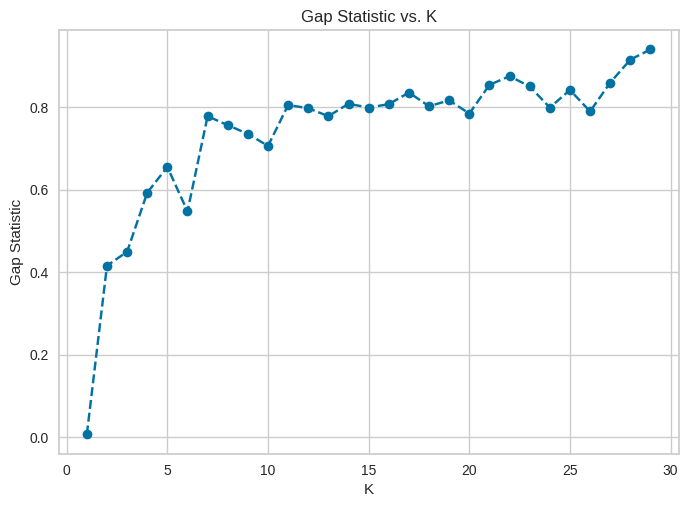

In [92]:
# Gap Statistic for K means. Fuente: Indraneel Dutta Baruah
# Tecnica demoradita ###

def optimalK(data, nrefs=3, maxClusters=10):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):

            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)

            # Fit to it
            km = KMeans(k, random_state =10)
            km.fit(randomReference)

            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)

        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap

        new_row = pd.DataFrame({'clusterCount': [k], 'gap': [gap]})
        resultsdf = pd.concat([resultsdf, new_row], ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)

score_g, df = optimalK(X_train_reduced, nrefs=5, maxClusters=30)

plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

df2 = df[df.gap == df.gap.max()]
print('Optimal number of clusters based on gap statistic:', df2['clusterCount'].tolist())

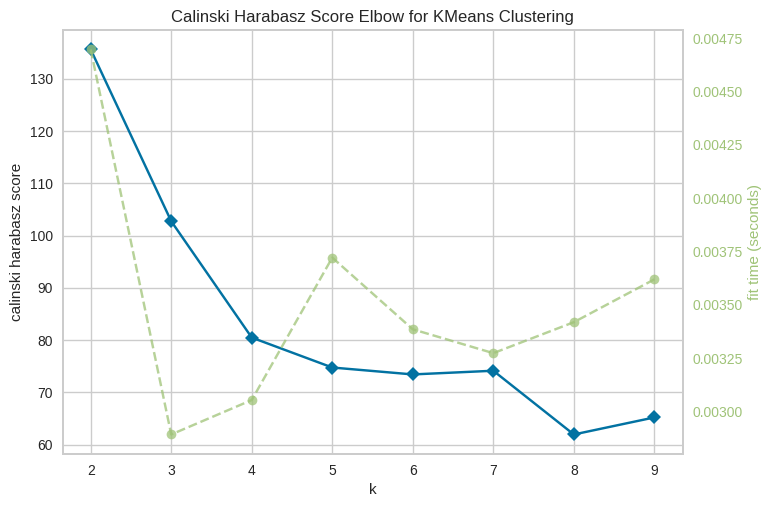

Optimal number of clusters based on calinski harabasz: [2]


In [93]:
# Calinski Harabasz Score for K means. Fuente: Indraneel Dutta Baruah

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(X_train_reduced)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on calinski harabasz:', df4['centers'].tolist())

Optimal number of clusters based on DB score: [2]


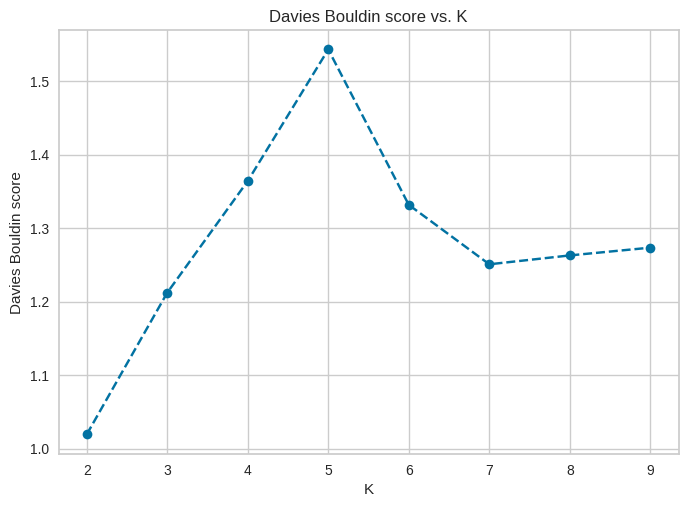

In [94]:
# Davies Bouldin score for K means. Fuente: Indraneel Dutta Baruah

from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center,random_state =10)

    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(X_train_reduced)

    # Calculate Silhoutte Score

    score = davies_bouldin_score(X_train_reduced, model)

    return score

scores = []
centers = list(range(2,10))

for center in centers:
    scores.append(get_kmeans_score(X_train_reduced, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

### Para Etiquetar la data-Se necesita saber el # de Cluster y Usamos Kmeans
- Podria existir otra forma de hacerlo que seria aplica directaente PCA antes de hallar el No de clusters

In [95]:
from sklearn.cluster import KMeans
# Realiza el clustering con K-Means
kmeans = KMeans(n_clusters=3)  # Número de clusters obtenidos tecnicas de clusters
labels = kmeans.fit_predict(X_train_reduced)

In [96]:
# X_train_reduced = X_train_reduced.drop('cluster_label', axis=1)
X_train_reduced

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
167                           0.4                             0.50   
180                           0.4                             0.50   
69                            0.4                             0.75   
239                           0.4                             0.75   
2                             0.4                             0.50   
..                            ...                              ...   
188                           0.2                             0.50   
71                            0.2                             0.50   
106                           0.2                             0.25   
270                           0.8                             1.00   
102                           0.4                             0.75   

     impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
167                  0.50                           0.333333   
180                  0.25                           0.333333   
69                   1.00                           1.000000   
239                  0.50                           0.666667   
2                    0.50                           0.666667   
..                    ...                                ...   
188                  0.25                           0.000000   
71                   0.50                           0.666667   
106                  0.25                           0.000000   
270                  1.00                           1.000000   
102                  0.75                           0.666667   

     tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  
167                  0.00          0.00            0.0  
180                  0.25          0.25            0.0  
69                   0.25          0.00            0.0  
239                  0.25          0.50            1.0  
2                    0.25          0.75            0.0  
..                    ...           ...            ...  
188                  0.25          0.25            0.0  
71                   0.00          0.25            0.0  
106                  0.00          0.00            1.0  
270                  0.50          0.25            1.0  
102                  0.00          0.00            1.0  

[175 rows x 7 columns]

In [97]:
# Agregación de las etiquetas numéricas al DataFrame
X_train_scaled = X_train_reduced.copy()
X_train_scaled['cluster_label'] = labels

In [98]:
from sklearn.ensemble import RandomForestClassifier

X_value = X_train_reduced  # Tus características
y_value = X_train_scaled['cluster_label']  # La etiqueta numérica que hemos asignado

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train_reduced, y_value)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

# Usamos el Random Forest para la Selección de características

In [99]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X_value), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)

In [100]:
feature_importances_sorted

PlatDig_Nequi                        0.593229
numEmpleados                         0.124126
VentasMensualesPlatDigitales         0.094858
impactoCrecimientoEmpresa_encoded    0.054022
impactoUtilidadEmpresa_enconded      0.050491
impactoVentasEmpresa                 0.042102
tiempoUsoPlatDigital                 0.041172
dtype: float64

In [101]:
0.277671 + 0.128573 + 0.112190 + 0.103562 + 0.102919 + 0.098887 + 	0.096587 + 0.093147 + 0.074502 + 	0.056054

1.144092

<Axes: >

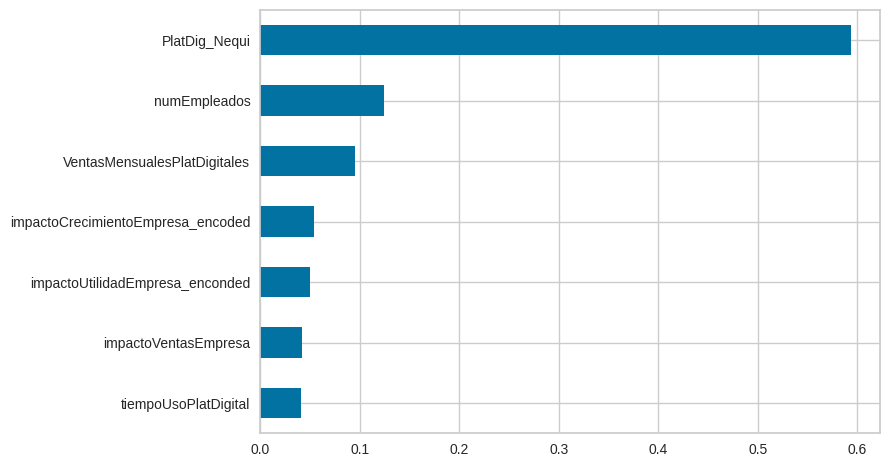

In [102]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_value.columns, 'y_axis':feature_importances_sorted}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh()

In [103]:
# '''Reducimos el conjunto de datos a las 9 características las más importantes mirando la imagen anterior
# pero vemos adelante que a mayor # de caract. más componenestes y mayor explicabilidad '''
X_reduced = X_value[list(feature_importances_sorted.head(10).index)].copy()
X_reduced

PlatDig_Nequi  numEmpleados  VentasMensualesPlatDigitales  \
167            0.0          0.00                           0.4   
180            0.0          0.25                           0.4   
69             0.0          0.00                           0.4   
239            1.0          0.50                           0.4   
2              0.0          0.75                           0.4   
..             ...           ...                           ...   
188            0.0          0.25                           0.2   
71             0.0          0.25                           0.2   
106            1.0          0.00                           0.2   
270            1.0          0.25                           0.8   
102            1.0          0.00                           0.4   

     impactoCrecimientoEmpresa_encoded  impactoUtilidadEmpresa_enconded  \
167                           0.333333                             0.50   
180                           0.333333                             0.50   
69                            1.000000                             0.75   
239                           0.666667                             0.75   
2                             0.666667                             0.50   
..                                 ...                              ...   
188                           0.000000                             0.50   
71                            0.666667                             0.50   
106                           0.000000                             0.25   
270                           1.000000                             1.00   
102                           0.666667                             0.75   

     impactoVentasEmpresa  tiempoUsoPlatDigital  
167                  0.50                  0.00  
180                  0.25                  0.25  
69                   1.00                  0.25  
239                  0.50                  0.25  
2                    0.50                  0.25  
..                    ...                   ...  
188                  0.25                  0.25  
71                   0.50                  0.00  
106                  0.25                  0.00  
270                  1.00                  0.50  
102                  0.75                  0.00  

[175 rows x 7 columns]

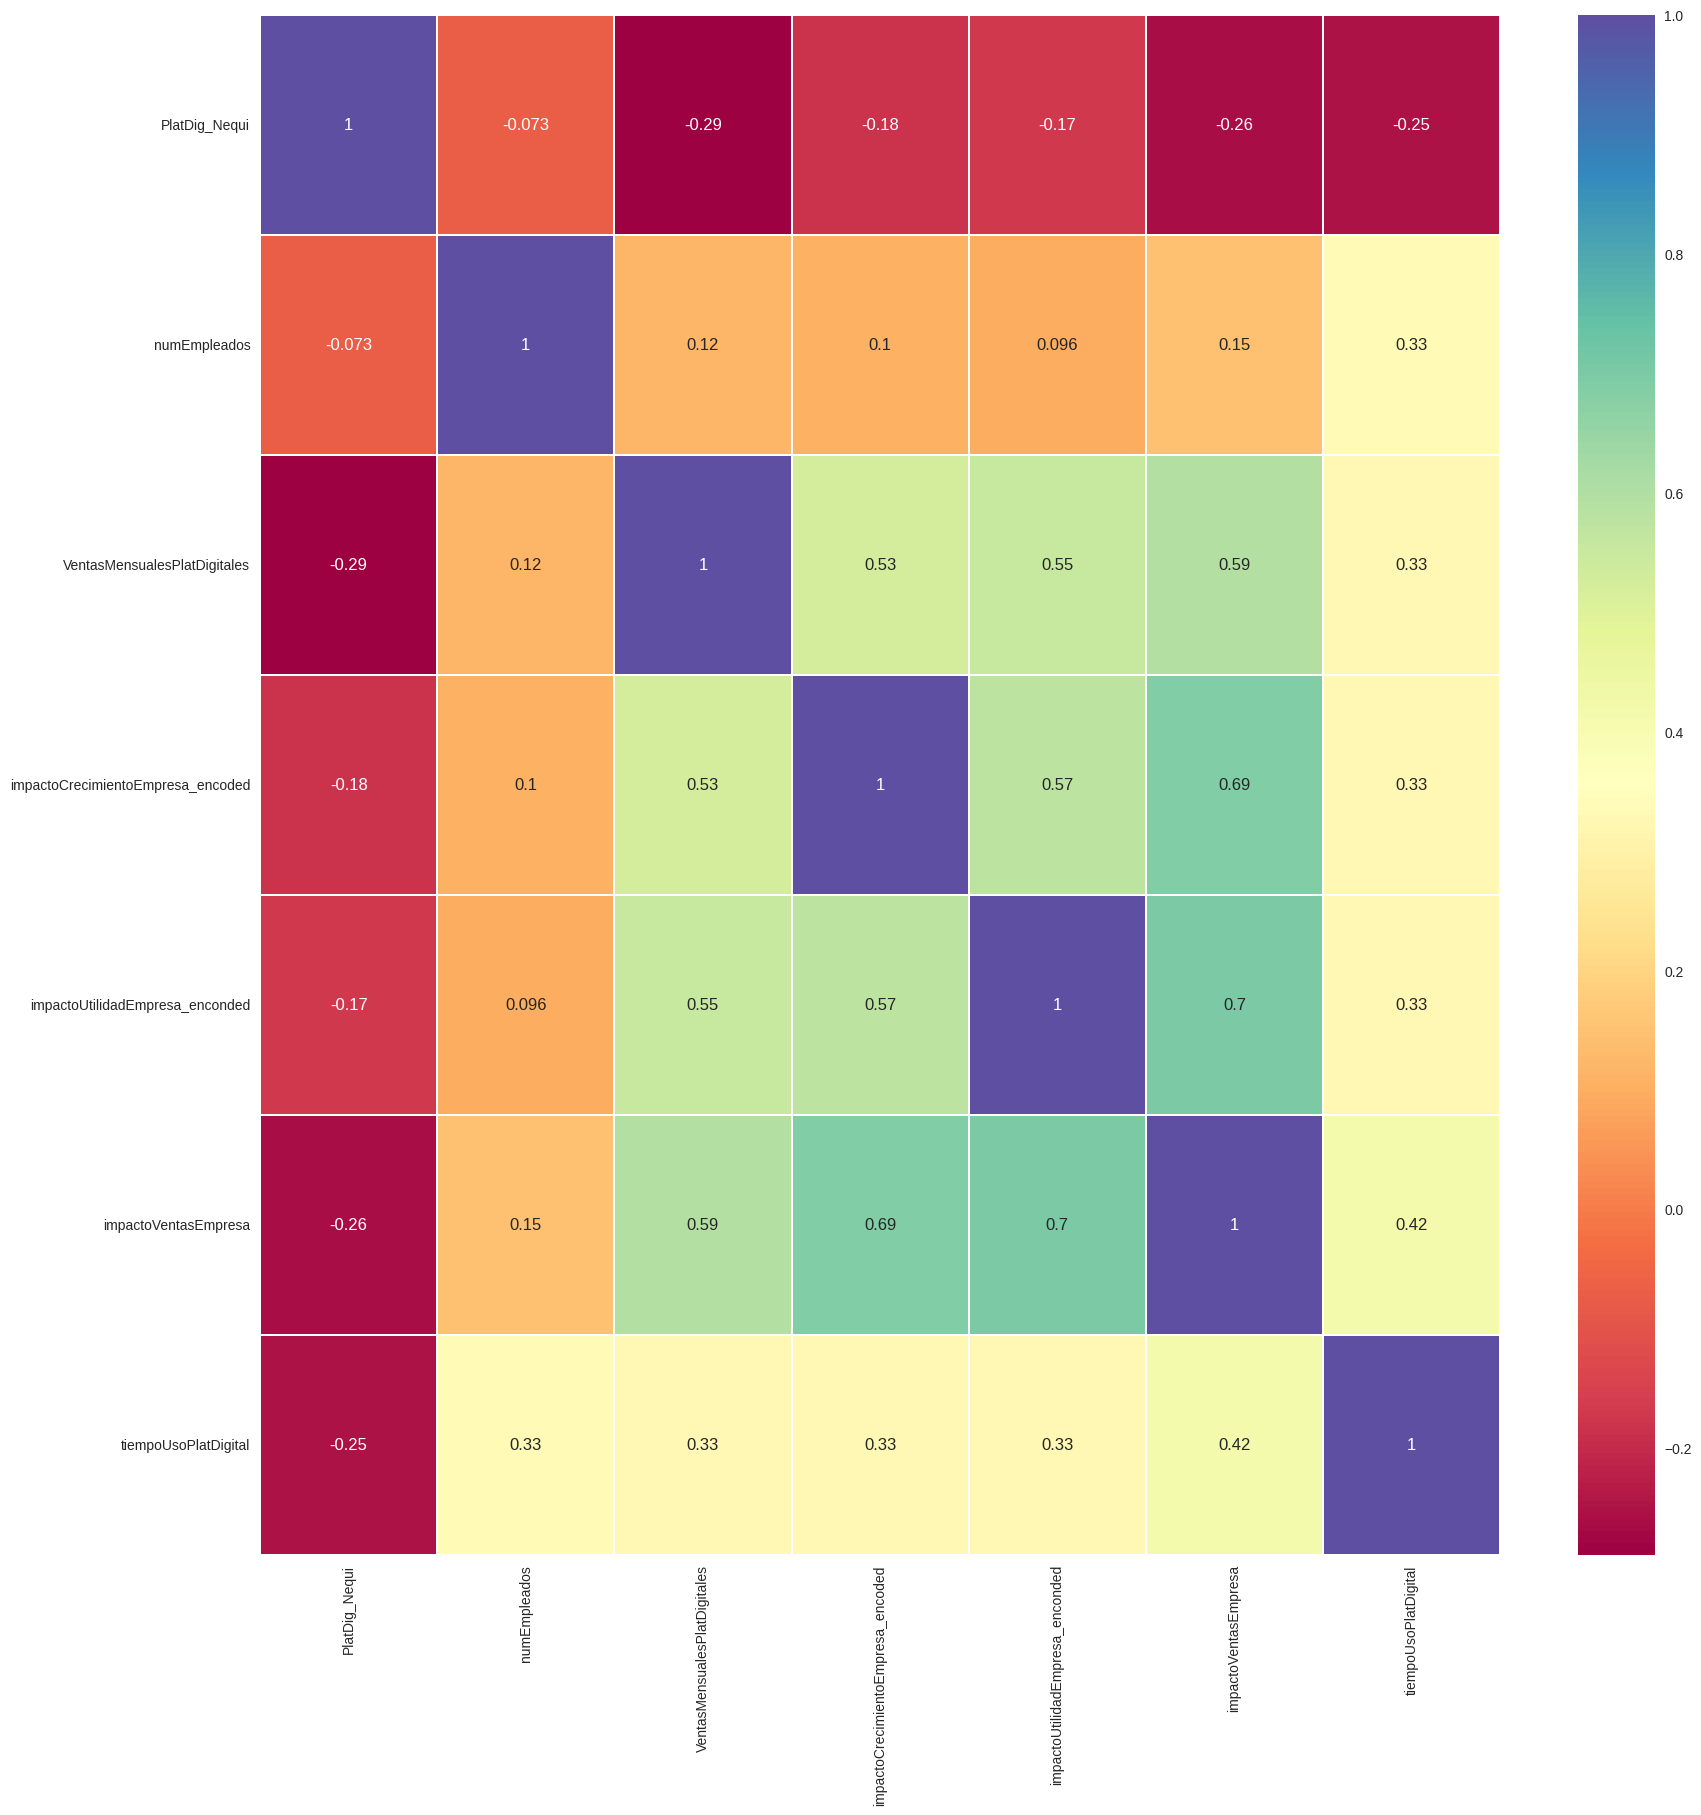

In [104]:
# Volvemos a mirar la correlación de variables mediante heatmap
sns.heatmap(X_reduced.corr(),annot=True, cmap='Spectral', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [105]:
#No esta desbalacedao no necesita balanceo
y_value.value_counts()

cluster_label
0    103
1     37
2     35
Name: count, dtype: int64

In [106]:
X_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 167 to 102
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   PlatDig_Nequi                      175 non-null    float64
 1   numEmpleados                       175 non-null    float64
 2   VentasMensualesPlatDigitales       175 non-null    float64
 3   impactoCrecimientoEmpresa_encoded  175 non-null    float64
 4   impactoUtilidadEmpresa_enconded    175 non-null    float64
 5   impactoVentasEmpresa               175 non-null    float64
 6   tiempoUsoPlatDigital               175 non-null    float64
dtypes: float64(7)
memory usage: 10.9 KB


In [107]:
# In[4]:
print('#### Mezclar la base de datos###############')
#Mezclar la base de datos
X_reduced = X_reduced.sample(frac=1).reset_index(drop=True)
X_reduced.head(10)

#### Mezclar la base de datos###############


PlatDig_Nequi  numEmpleados  VentasMensualesPlatDigitales  \
0            0.0          0.00                           0.8   
1            1.0          0.00                           0.4   
2            1.0          0.00                           0.4   
3            1.0          0.00                           0.2   
4            1.0          0.00                           0.4   
5            1.0          0.75                           0.4   
6            1.0          0.00                           0.4   
7            0.0          0.25                           0.2   
8            1.0          0.00                           0.4   
9            0.0          0.25                           0.6   

   impactoCrecimientoEmpresa_encoded  impactoUtilidadEmpresa_enconded  \
0                           1.000000                             0.75   
1                           0.666667                             0.75   
2                           0.666667                             0.75   
3                           0.333333                             0.25   
4                           0.666667                             0.75   
5                           0.666667                             0.75   
6                           0.666667                             0.75   
7                           1.000000                             0.75   
8                           0.666667                             0.50   
9                           0.666667                             0.75   

   impactoVentasEmpresa  tiempoUsoPlatDigital  
0                  0.75                  0.50  
1                  0.75                  0.50  
2                  0.50                  0.25  
3                  0.25                  0.00  
4                  0.75                  0.25  
5                  0.75                  0.50  
6                  0.75                  0.25  
7                  0.75                  0.25  
8                  0.25                  0.00  
9                  0.50                  0.25

(0.0, 1.05)

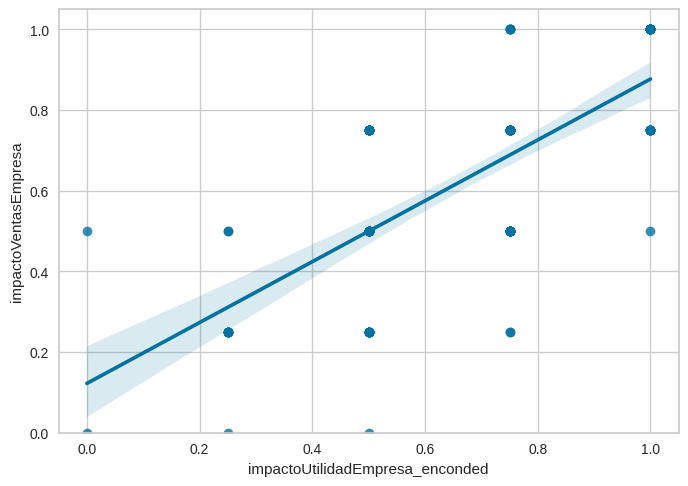

In [108]:
sns.regplot(x="impactoUtilidadEmpresa_enconded", y="impactoVentasEmpresa", data=X_reduced)
plt.ylim(0,)

(0.0, 1.05)

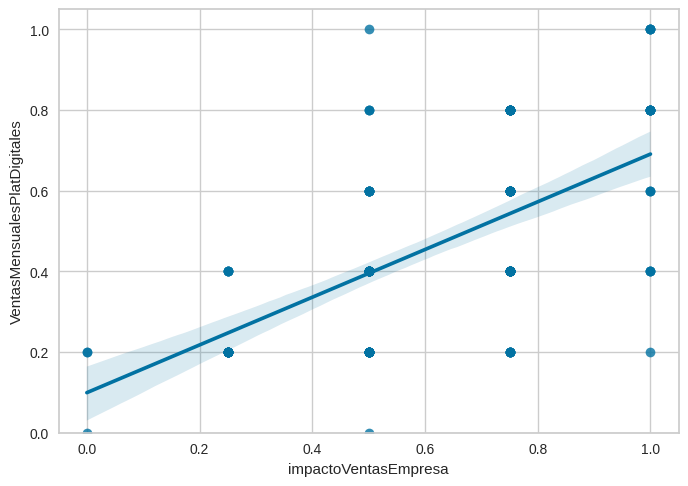

In [109]:
sns.regplot(x="impactoVentasEmpresa", y="VentasMensualesPlatDigitales", data=X_reduced)
plt.ylim(0,)

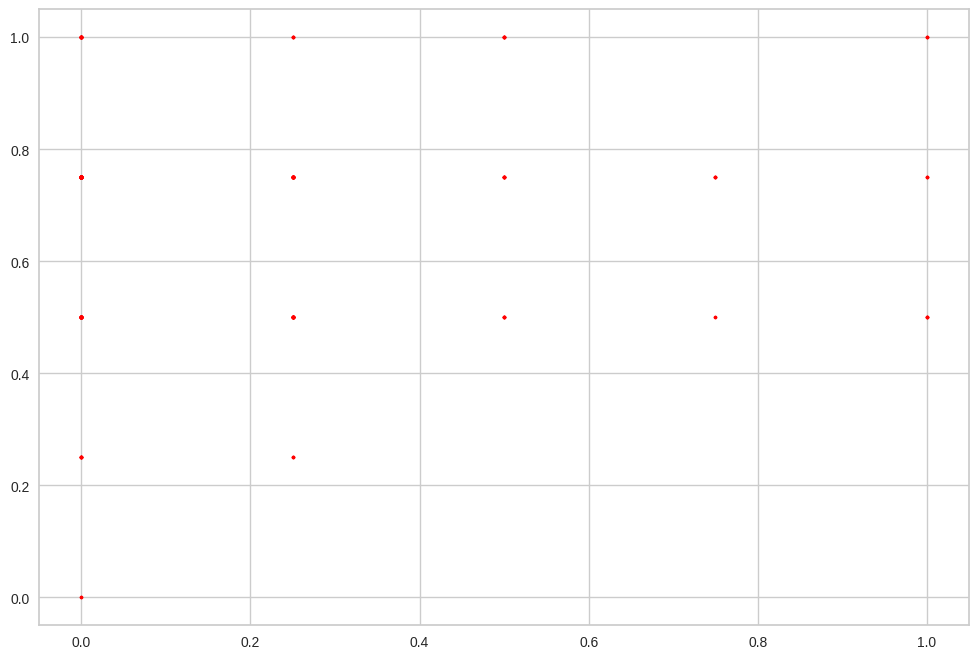

In [110]:
'''Inicialización de los cluster centroides donde (K=4)'''
K=3

#Representación grafica de los datos
plt.rcParams['figure.figsize'] = (12,8)

feature1 = X_reduced['numEmpleados'].values
feature2 = X_reduced['impactoUtilidadEmpresa_enconded'].values

plt.scatter(feature1, feature2, c='red', s=5)
plt.show()

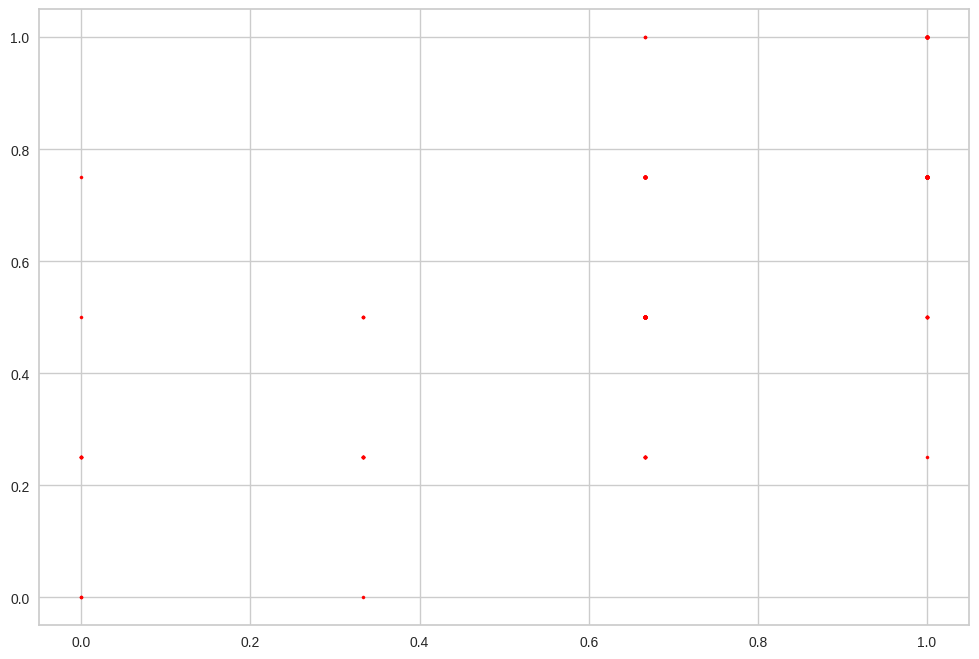

In [111]:
'''Inicialización de los cluster centroides donde (K=4)'''

#Representación grafica de los datos
plt.rcParams['figure.figsize'] = (12,8)

feature1 = X_reduced['impactoCrecimientoEmpresa_encoded'].values
feature2 = X_reduced['impactoVentasEmpresa'].values

plt.scatter(feature1, feature2, c='red', s=5)
plt.show()

(0.0, 1.05)

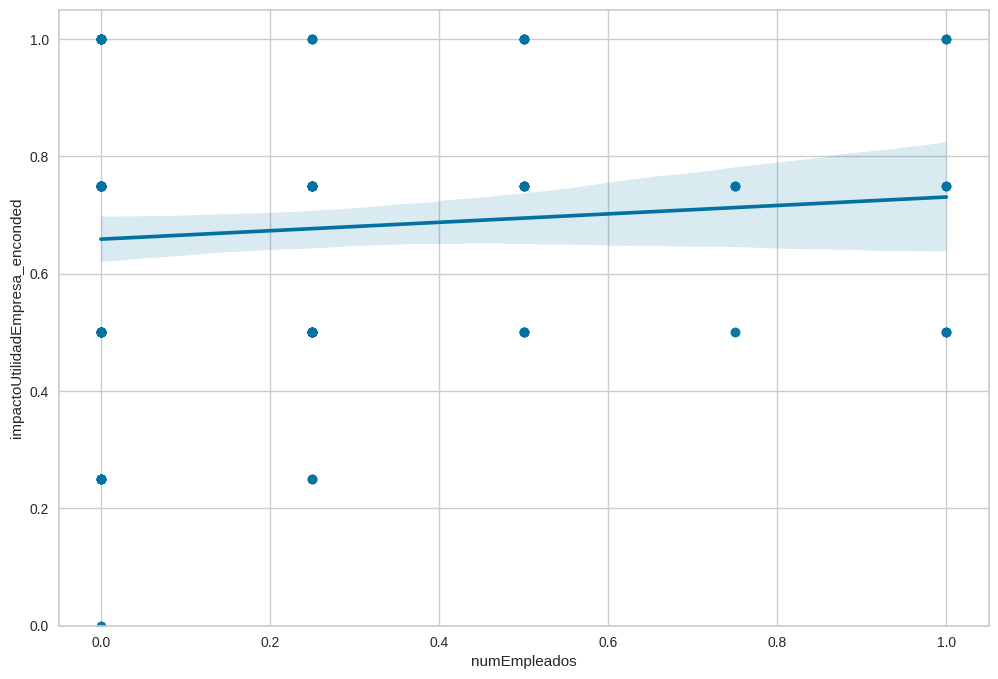

In [112]:
sns.regplot(x="numEmpleados", y="impactoUtilidadEmpresa_enconded", data=X_reduced)
plt.ylim(0,)

(0.0, 1.05)

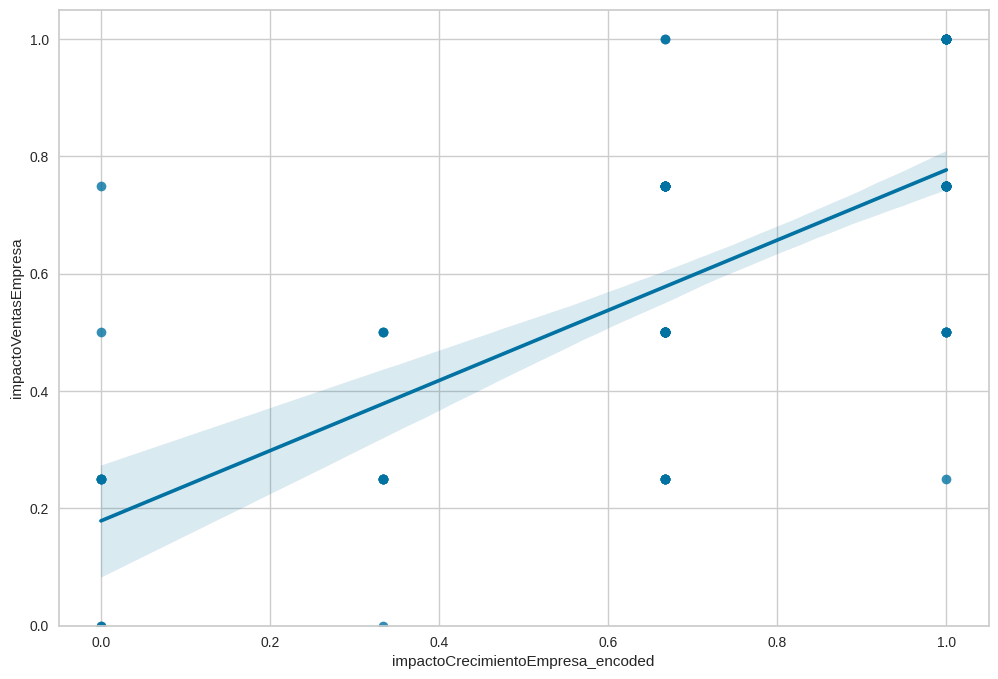

In [113]:
sns.regplot(x="impactoCrecimientoEmpresa_encoded", y="impactoVentasEmpresa", data=X_reduced)
plt.ylim(0,)

(0.0, 1.05)

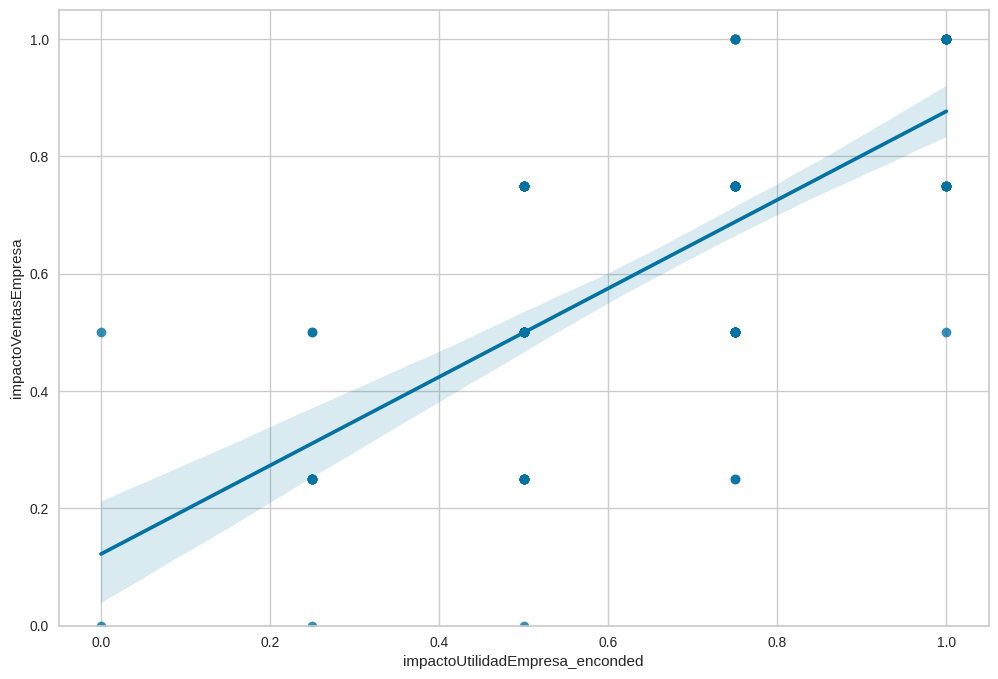

In [114]:
sns.regplot(x="impactoUtilidadEmpresa_enconded", y="impactoVentasEmpresa", data=X_reduced)
plt.ylim(0,)

In [115]:
# Obtener los centroides
centroids = kmeans.cluster_centers_

In [116]:
# Grafica los datos y los centroides
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

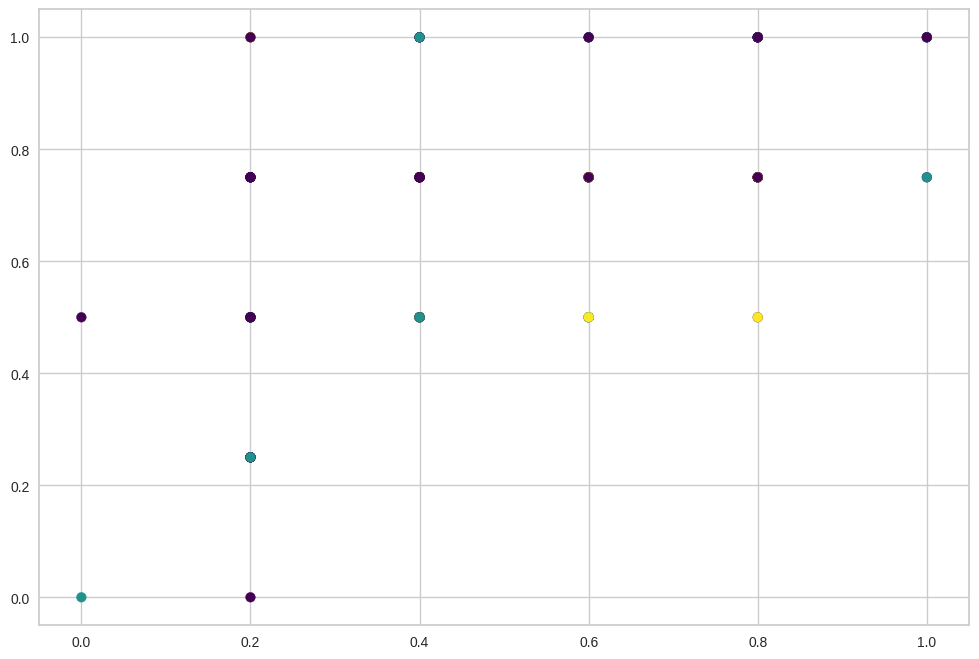

In [117]:
# Grafica los puntos de datos en función de las características
plt.scatter(X_reduced['VentasMensualesPlatDigitales'], X_reduced['impactoUtilidadEmpresa_enconded'], c=labels, cmap='viridis')

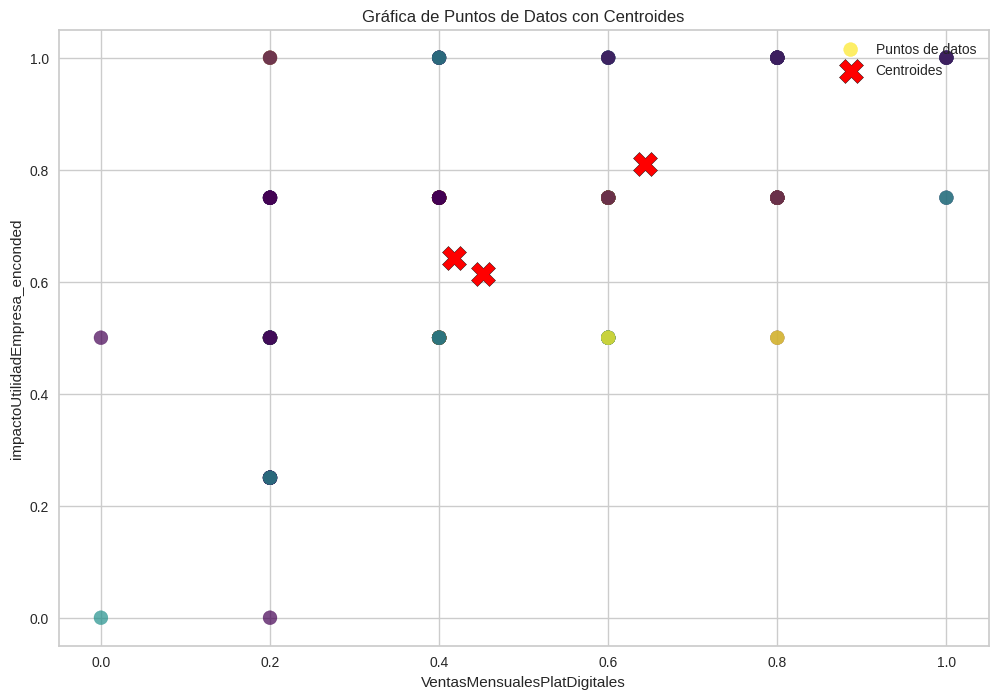

In [118]:
# Crear la gráfica de dispersión de puntos de datos con cmap de colores y un tamaño de puntos menor
plt.scatter(X_reduced['VentasMensualesPlatDigitales'], X_reduced['impactoUtilidadEmpresa_enconded'],
            c=labels, cmap='viridis', s=100, label='Puntos de datos', alpha=0.7)

# Agregar los centroides con marcadores grandes y colores específicos
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='X', c='red', label='Centroides', edgecolor='black')

# Ajustar las leyendas
plt.legend(loc='upper right')

# Etiquetas y título
plt.xlabel('VentasMensualesPlatDigitales')
plt.ylabel('impactoUtilidadEmpresa_enconded')
plt.title('Gráfica de Puntos de Datos con Centroides')

# Mostrar la gráfica
plt.show()

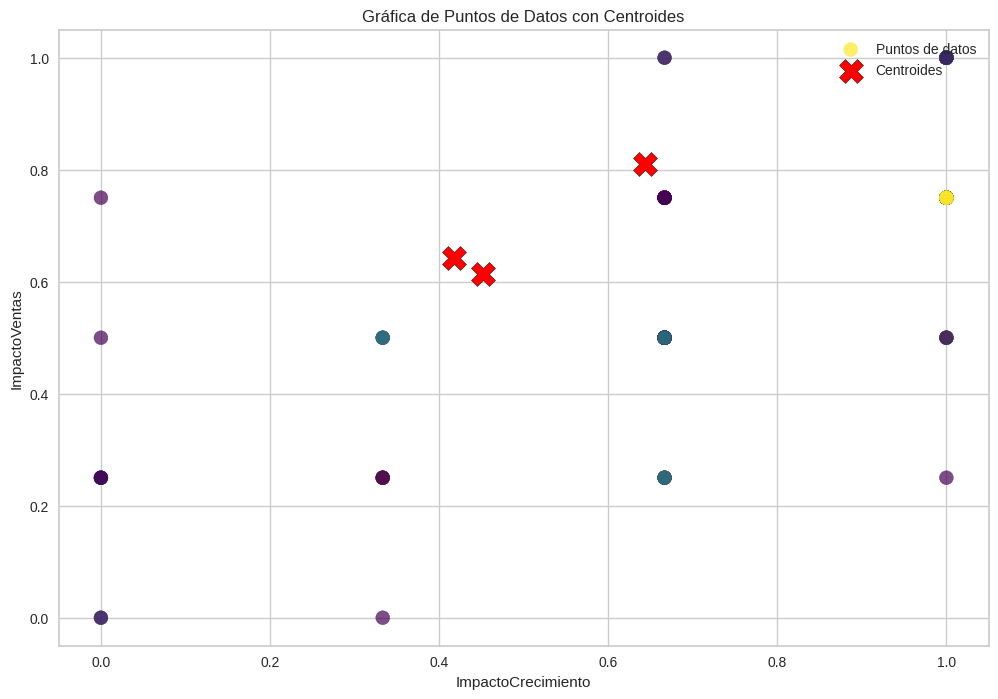

In [119]:
# Crear la gráfica de dispersión de puntos de datos con cmap de colores y un tamaño de puntos menor
plt.scatter(X_reduced['impactoCrecimientoEmpresa_encoded'], X_reduced['impactoVentasEmpresa'],
            c=labels, cmap='viridis', s=100, label='Puntos de datos', alpha=0.7)

# Agregar los centroides con marcadores grandes y colores específicos
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, marker='X', c='red', label='Centroides', edgecolor='black')

# Ajustar las leyendas
plt.legend(loc='upper right')

# Etiquetas y título
plt.xlabel('ImpactoCrecimiento')
plt.ylabel('ImpactoVentas')
plt.title('Gráfica de Puntos de Datos con Centroides')

# Mostrar la gráfica
plt.show()


In [120]:
# Función de bucle para identificar el número de componentes principales que explican al menos el 85% de la varianza

from sklearn.decomposition import PCA

for comp in range(2, X_reduced.shape[1]):
    modelo_pca = PCA(n_components= comp)
    modelo_pca.fit(X_reduced)
    comp_check = modelo_pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break

Final_PCA = PCA(n_components= final_comp)
Final_PCA.fit(X_reduced)
cluster_df=Final_PCA.transform(X_reduced)

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))
#con 3 comp explicacion de la variabilidad del 87% con mormalizado

Using 4 components, we can explain 0.8949998267576597% of the variability in the original data.


In [121]:
#Se convierte el array a dataframe para añadir nombrs a los ejes(x=Componentes, Y=caracteriticas)
pd.DataFrame(modelo_pca.components_,columns=X_reduced.columns,index = [f'PC-{i+1}' for i in range(final_comp)]).T

PC-1      PC-2      PC-3      PC-4
PlatDig_Nequi                      0.878004  0.471417  0.003705  0.056943
numEmpleados                      -0.098520  0.216191  0.915967 -0.321379
VentasMensualesPlatDigitales      -0.225760  0.328585 -0.126474 -0.089759
impactoCrecimientoEmpresa_encoded -0.225459  0.501659 -0.209103 -0.248218
impactoUtilidadEmpresa_enconded   -0.171259  0.374621 -0.149951 -0.032515
impactoVentasEmpresa              -0.234469  0.419714 -0.131587 -0.008774
tiempoUsoPlatDigital              -0.182480  0.234300  0.247931  0.907012

In [122]:
#Vector con el porcentaje de influencia de la varianza explicada por cada componente
explained_variance = modelo_pca.explained_variance_ratio_
explained_variance

array([0.46927969, 0.23466835, 0.13662036, 0.05443142])

# Los componentes corresponden a combinaciones de las características originales, los propios componentes se almacenan como un atributo del objeto PCA ajustado:

In [123]:
Final_PCA.components_

array([[ 0.87800374, -0.09851987, -0.22576005, -0.22545894, -0.17125872,
        -0.23446878, -0.18247954],
       [ 0.4714171 ,  0.21619065,  0.32858544,  0.5016588 ,  0.37462122,
         0.41971443,  0.23429965],
       [ 0.00370462,  0.91596736, -0.12647425, -0.2091034 , -0.14995119,
        -0.13158708,  0.24793059],
       [ 0.05694315, -0.32137876, -0.08975894, -0.2482177 , -0.03251452,
        -0.00877436,  0.90701174]])

In [124]:
df_comp = pd.DataFrame(modelo_pca.components_, columns=X_reduced.columns,index = [f'PC-{i+1}' for i in range(final_comp)])

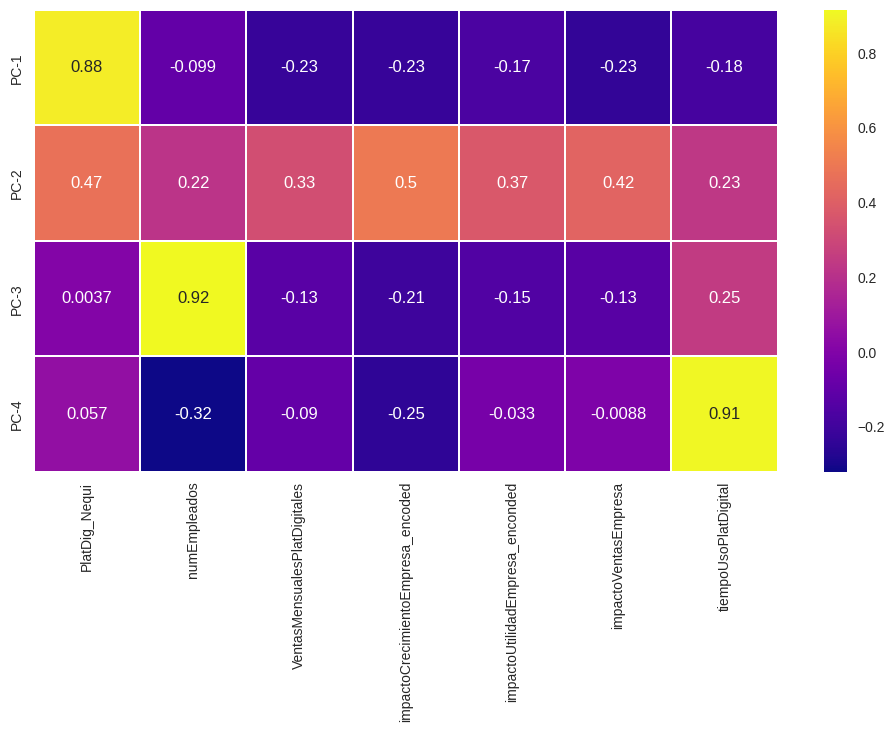

In [125]:
sns.heatmap(df_comp,annot=True, cmap='plasma', linewidths=0.1);
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

----------------------------------------------------
Percentage of variance explanation by each component
----------------------------------------------------
[0.46927969 0.23466835 0.13662036 0.05443142]


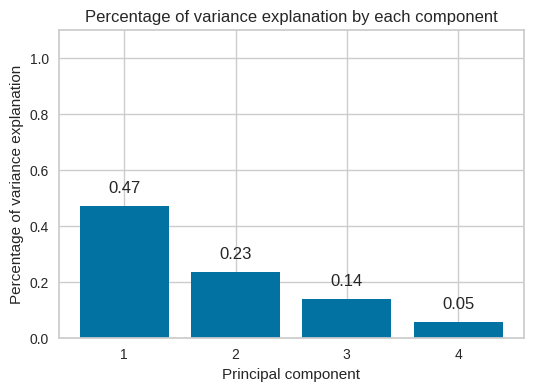

In [126]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Percentage of variance explanation by each component')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X_reduced.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentage of variance explanation by each component')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage of variance explanation');

In [127]:
#Visualizacion
cluster_df.shape
cluster_df = pd.DataFrame(cluster_df,index=X_reduced.index)
cluster_df

0         1         2         3
0   -0.709611  0.043725 -0.244400  0.139657
1    0.333850  0.216489 -0.120404  0.315243
2    0.438087  0.052985 -0.149490  0.090684
3    0.748259 -0.530766 -0.008604 -0.016928
4    0.379470  0.157914 -0.182387  0.088490
..        ...       ...       ...       ...
170 -0.808598  0.252774  0.758845  0.062983
171  0.189383  0.510615 -0.073686 -0.110498
172 -0.638098 -0.073974  0.221302 -0.165046
173 -0.589306 -0.189211 -0.149404  0.240348
174 -0.073538  0.938971  0.270869  0.479094

[175 rows x 4 columns]

In [128]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

Entrenamiento de KMEANS con el conjunto de datos reducido y escalado

In [129]:
# K means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
#from sklearn.metrics import completeness_score
# Fit K-Means
kmeans_1 = KMeans(n_clusters=3, random_state= 42)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(cluster_df)

# Calculate cluster validation metrics internas
score_kemans_s = silhouette_score(cluster_df, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(cluster_df, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(cluster_df, predictions)

# Calculate cluster validation metrics externas
score_kemans_p = purity_score(y_value, kmeans_1.labels_)
score_kemans_h = metrics.homogeneity_score(y_value,  kmeans_1.labels_)
score_kemans_ce = metrics.completeness_score(y_value, kmeans_1.labels_)
score_kemans_v =  metrics.v_measure_score(y_value, kmeans_1.labels_)


print('***Evaluación de las Metricas Internas**')
# Importante darse cuenta de que no le pasamos las etiquetas
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)
print()
print('***Evalaución de las Metricas Externas***')
print("Purity Score: %.4f" % score_kemans_p)
print("Homogeneity_score: %.4f"% score_kemans_h)
print("Completeness_score: %.4f"% score_kemans_ce)
print("v_measure_score:  %.4f"% score_kemans_v)

***Evaluación de las Metricas Internas**
Silhouette Score: 0.3780
Calinski Harabasz Score: 132.9395
Davies Bouldin Score: 1.0442

***Evalaución de las Metricas Externas***
Purity Score: 0.5886
Homogeneity_score: 0.0068
Completeness_score: 0.0061
v_measure_score:  0.0064


In [130]:
print('***Evaluación de las Metricas Internas**')
# Importante darse cuenta de que no le pasamos las etiquetas
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)
print()
print('***Evalaución de las Metricas Externas***')
print("Purity Score: %.4f" % score_kemans_p)
print("Homogeneity_score: %.4f"% score_kemans_h)
print("Completeness_score: %.4f"% score_kemans_ce)
print("v_measure_score:  %.4f"% score_kemans_v)

***Evaluación de las Metricas Internas**
Silhouette Score: 0.3780
Calinski Harabasz Score: 132.9395
Davies Bouldin Score: 1.0442

***Evalaución de las Metricas Externas***
Purity Score: 0.5886
Homogeneity_score: 0.0068
Completeness_score: 0.0061
v_measure_score:  0.0064


In [131]:
# Evaluamos los clusters y el contenido que se han formado
from collections import Counter

counter = Counter(predictions.tolist())
bad_counter = Counter(predictions[y_value == 1].tolist())

for key in sorted(counter.keys()):
    print("Label {0} has {1} samples - {2} are malicious samples".format(
        key, counter[key], bad_counter[key]))

Label 0 has 72 samples - 15 are malicious samples
Label 1 has 52 samples - 11 are malicious samples
Label 2 has 51 samples - 11 are malicious samples


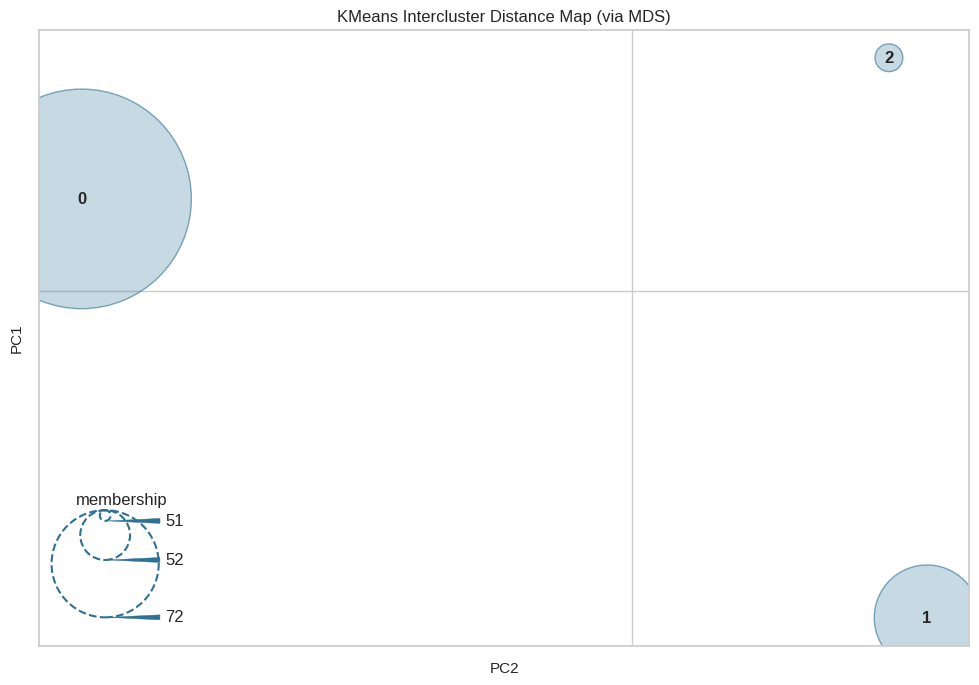

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [132]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(kmeans_1)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [133]:
def gap_stat_kmeans(data = cluster_df,nrefs=3,k=4):
    # Gap Stat
    refDisps = np.zeros(nrefs)
    # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
    for i in range(nrefs):

        # Create new random reference set
        randomReference = np.random.random_sample(size=cluster_df.shape)

        # Fit to it
        km = KMeans(k, random_state =10)
        km.fit(randomReference)

        refDisp = km.inertia_
        refDisps[i] = refDisp

    # Fit cluster to original data and create dispersion
    km = KMeans(k)
    km.fit(cluster_df)

    origDisp = km.inertia_

    # Calculate gap statistic
    score_g = np.log(np.mean(refDisps)) - np.log(origDisp)
    return score_g

score_kemans_g = gap_stat_kmeans(cluster_df,3,3)
print('Gap Statistic Score: %.4f' % score_kemans_g)

Gap Statistic Score: -0.0648


## Heirarchical Clustering

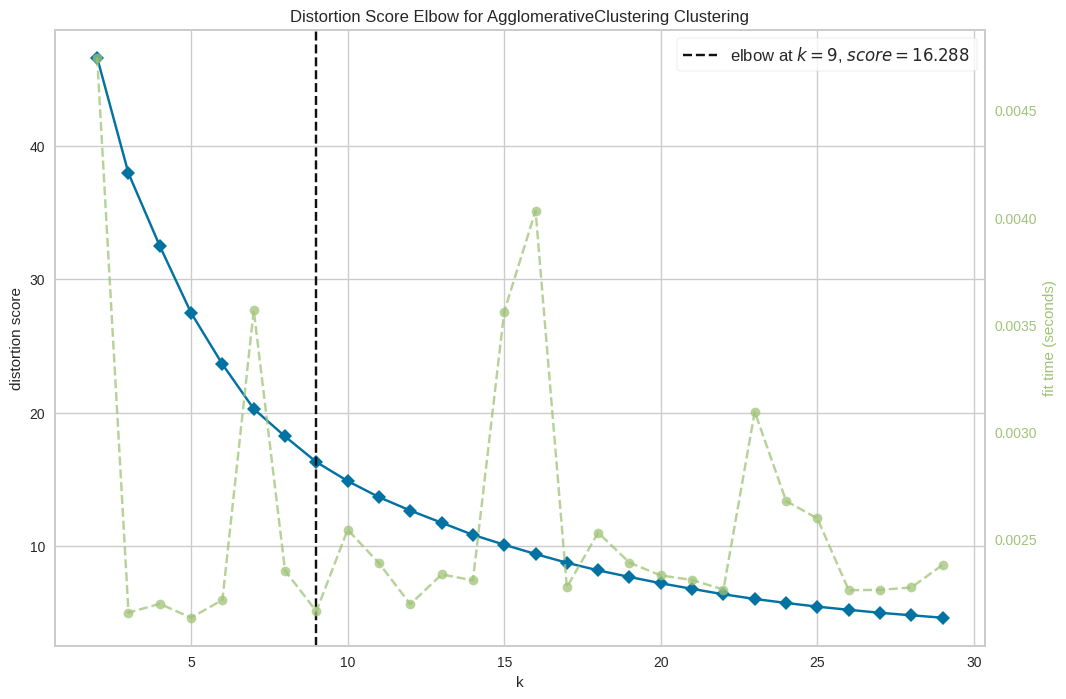

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [134]:
# Elbow Method for Heirarchical Clustering
from sklearn.cluster import MiniBatchKMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

# define dataset
# define the model


model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

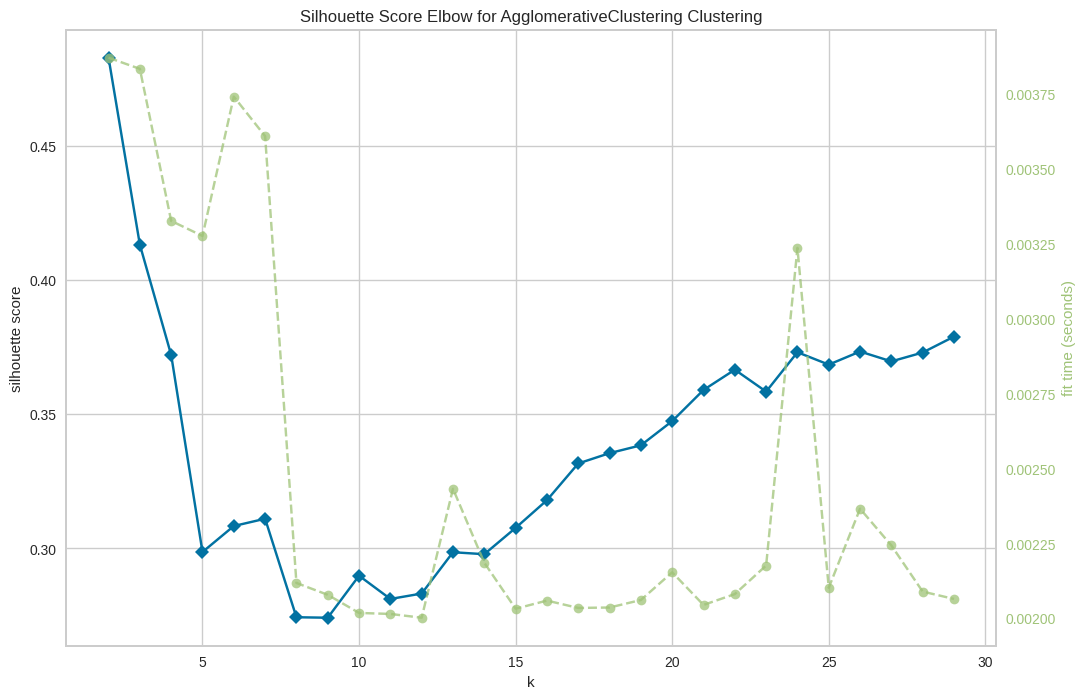

Optimal number of clusters based on silhouette score: [2]


In [135]:
# Silhouette Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

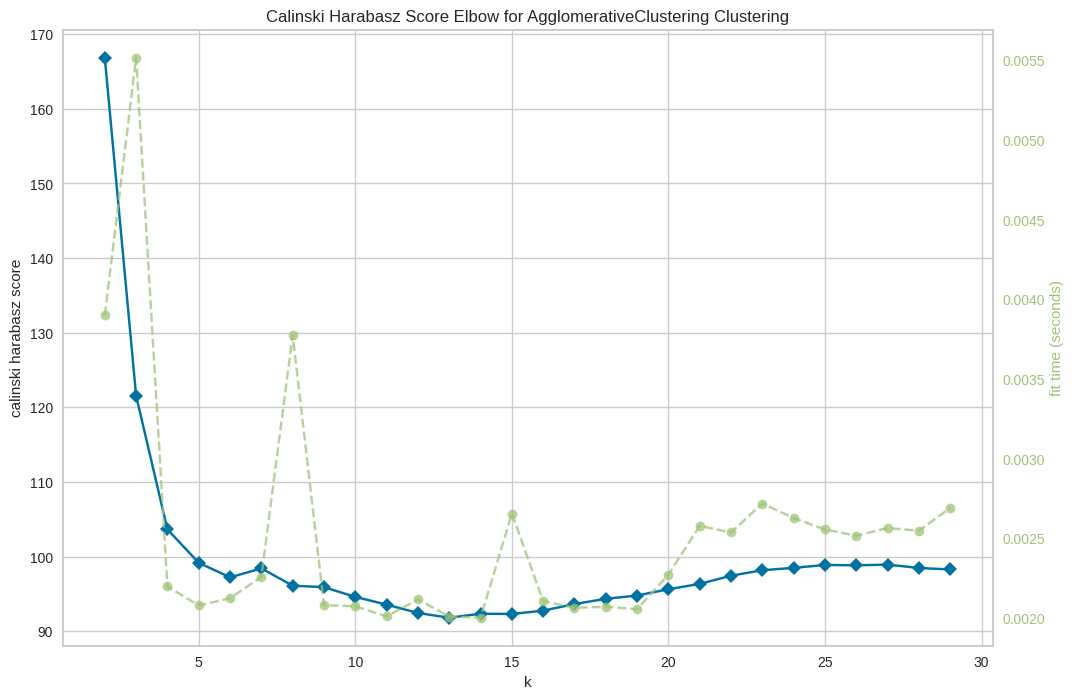

Optimal number of clusters based on silhouette score: [2]


In [136]:
# Calinski Harabasz Score for Hierarchical Clustering

# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(cluster_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

Optimal number of clusters based on DB score: [3]


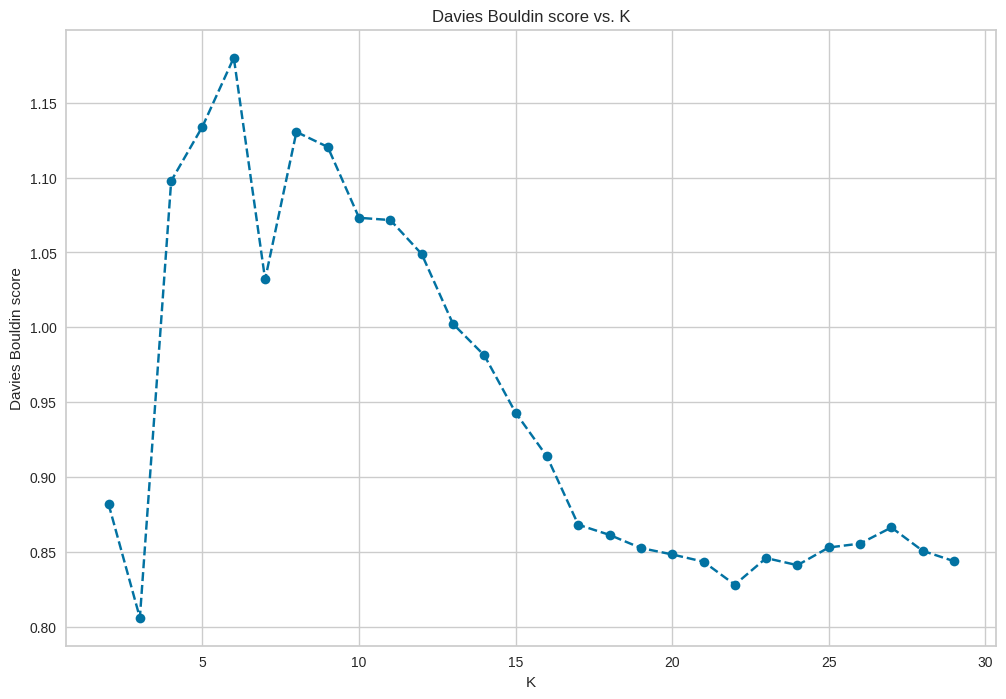

In [137]:
# Davies Bouldin score for Hierarchical Clustering

from sklearn.metrics import davies_bouldin_score

def get_AG_clustering_score(data, center):
    '''
    returns the AG_clustering score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit AG_clustering to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the AG_clustering model fit to the data
    '''
    #instantiate AG_clustering
    AG_clustering = AgglomerativeClustering(n_clusters= center)

    # Then fit the model to your data using the fit method
    model = AG_clustering.fit_predict(cluster_df)

    # Calculate Silhoutte Score

    score = davies_bouldin_score(cluster_df, model)

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_AG_clustering_score(cluster_df, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');


df3 = pd.DataFrame(centers,columns=['centers'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of clusters based on DB score:', df4['centers'].tolist())

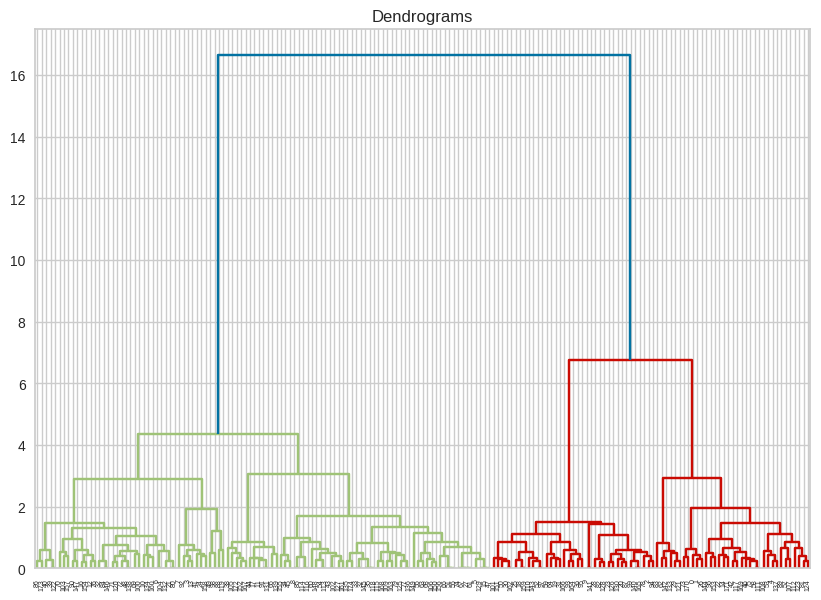

In [138]:
# 1. Dendogram for Heirarchical Clustering. Fuente: Indraneel Dutta Baruah
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))
pyplot.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X_train_scaled, method='ward'))

In [139]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit(cluster_df)
yhat_2 = model.fit_predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_AGclustering_s = silhouette_score(cluster_df, yhat.labels_, metric='euclidean')

score_AGclustering_c = calinski_harabasz_score(cluster_df, yhat.labels_)

score_AGclustering_d = davies_bouldin_score(cluster_df, yhat_2)




print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)

print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.4132
Calinski Harabasz Score: 121.5498
Davies Bouldin Score: 0.8061


In [140]:
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)

print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.4132
Calinski Harabasz Score: 121.5498
Davies Bouldin Score: 0.8061


In [141]:
! pip install kneed

### DBSCAN

0.40413007509214366


<Figure size 500x500 with 0 Axes>

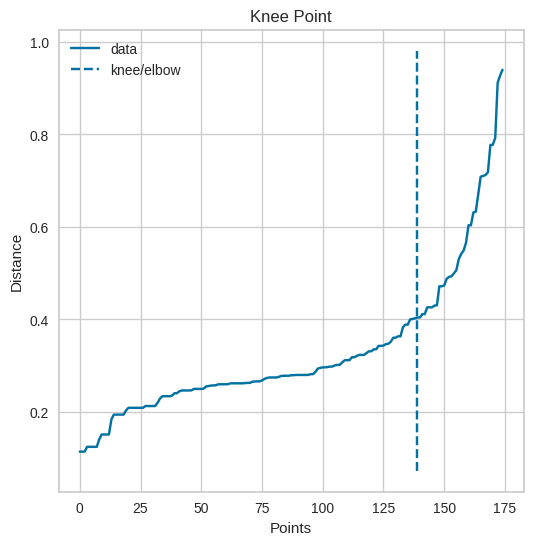

In [142]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(cluster_df)
distances, indices = neighbors.kneighbors(cluster_df)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [143]:
print(distances[knee.knee])  # Esto imprime el valor óptimo de eps.


0.40413007509214366


Optimal number of min_samples based on silhouette score: [22]


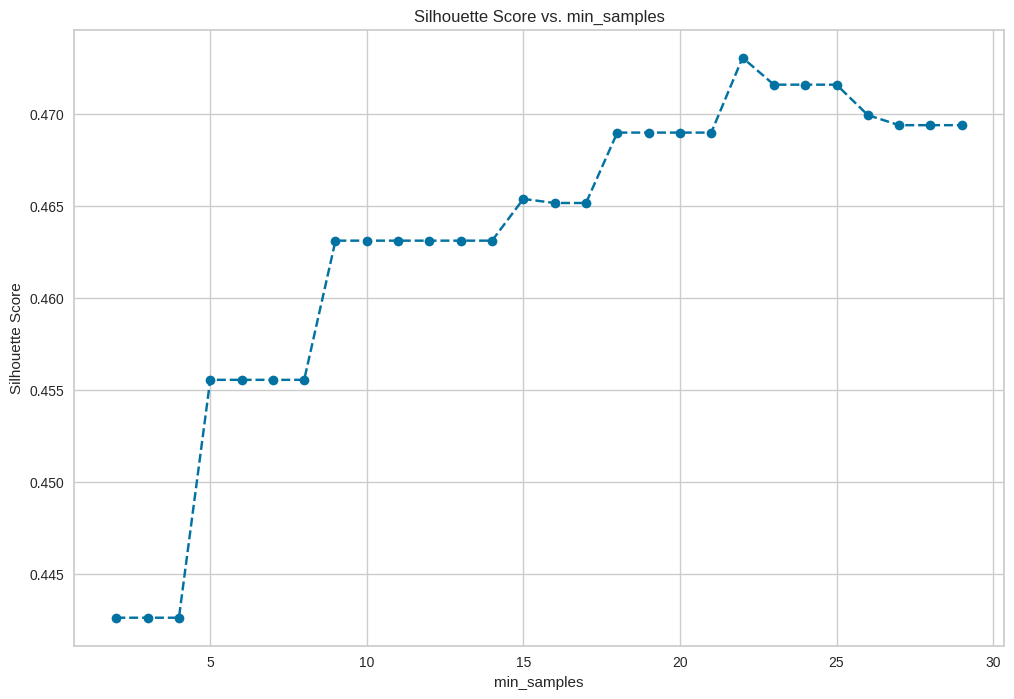

In [144]:
# Silhouette Score for DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    '''

    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Silhouette Score for DBSCAN
    '''
    #instantiate kmeans
    dbscan = DBSCAN(eps= 0.5563192939967789, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(cluster_df)

    # Calculate Silhoutte Score

    score = silhouette_score(cluster_df, model.labels_, metric='euclidean')

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(cluster_df, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

Optimal number of min_sample based on Calinski Harabasz score: [16, 17]


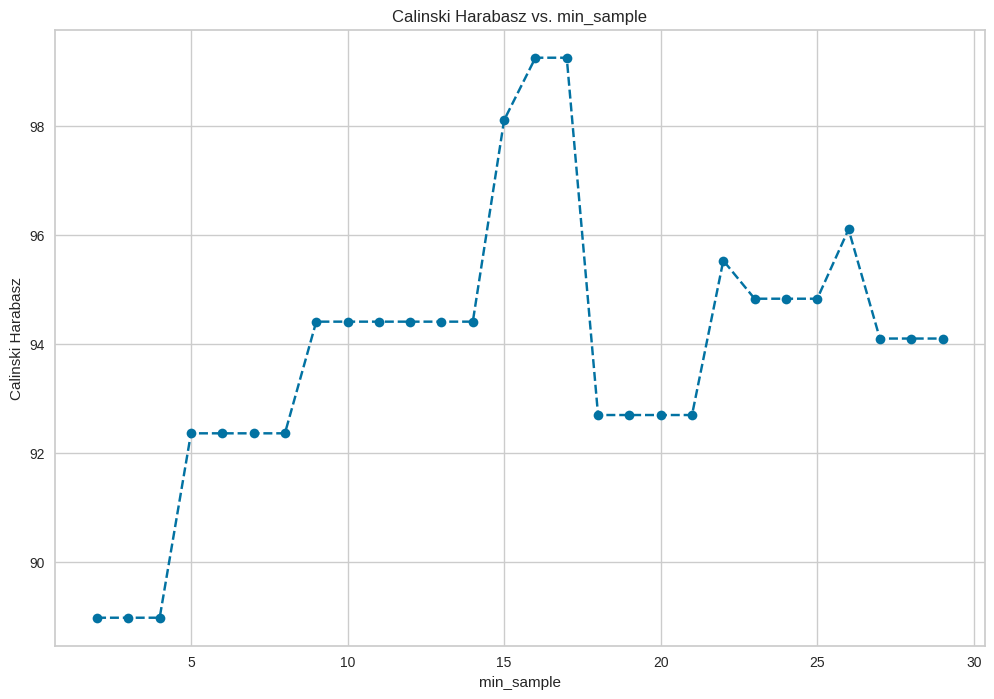

In [145]:
# Calinski Harabasz for DBSCAN

from sklearn.metrics import calinski_harabasz_score

def get_dbscan_score(data, center):
    '''

    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Calinski Harabasz score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps= 0.5563192939967789, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(cluster_df)

    # Calculate Silhoutte Score

    score = calinski_harabasz_score(cluster_df, dbscan.labels_)

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(cluster_df, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_sample based on Calinski Harabasz score:', df4['min_sample'].tolist())

Optimal number of min_samples based on DB score: [2, 3, 4]


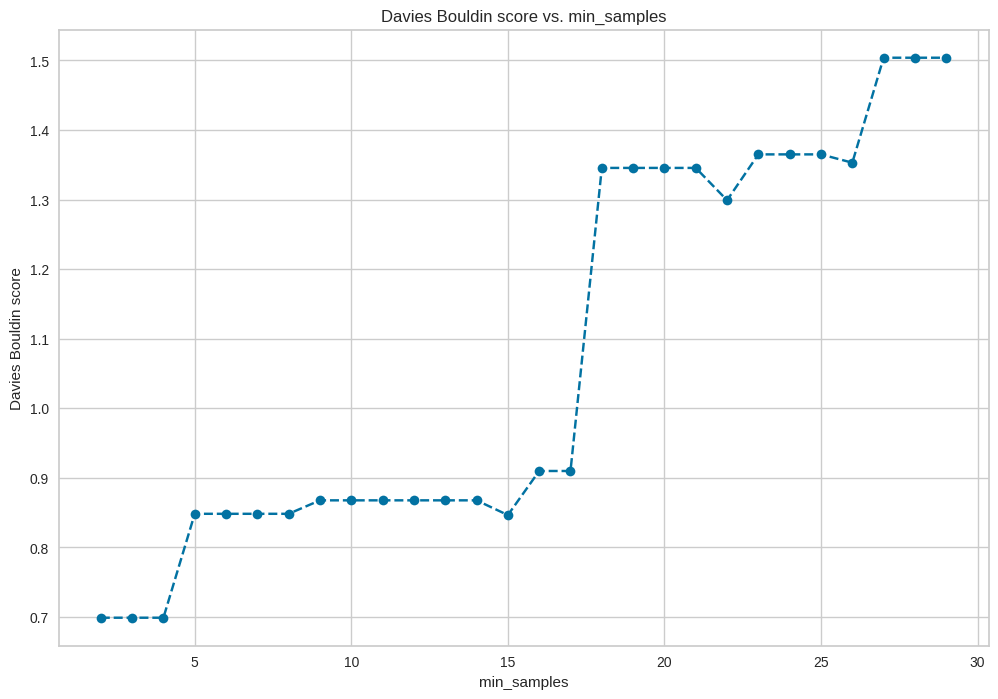

In [146]:
# Davies Bouldin score for DBSCAN

from sklearn.metrics import davies_bouldin_score

def get_dbscan_score(data, center):
    '''
    returns the dbscan score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit dbscan to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the dbscan model fit to the data
    '''
    #instantiate dbscan
    dbscan = DBSCAN(eps= 0.5563192939967789, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit_predict(cluster_df)

    # Calculate Silhoutte Score

    score = davies_bouldin_score(cluster_df, model)

    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(cluster_df, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())

In [147]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=0.5563192939967789, min_samples= 18)

# rule of thumb for min_samples: 2*len(cluster_df.columns)

# fit model and predict clusters
yhat = model.fit_predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_dbsacn_s = silhouette_score(cluster_df, yhat, metric='euclidean')

score_dbsacn_c = calinski_harabasz_score(cluster_df, yhat)

score_dbsacn_d = davies_bouldin_score(cluster_df, yhat)



print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)

print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.4690
Calinski Harabasz Score: 92.6907
Davies Bouldin Score: 1.3455


In [148]:
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)

print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.4690
Calinski Harabasz Score: 92.6907
Davies Bouldin Score: 1.3455


## GMM(Gaussian Mixture Clustering)




In [149]:
# BIC for GMM

from sklearn.mixture import GaussianMixture
n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        gmm.fit(cluster_df)
        score.append((cov,n_comp,gmm.bic(cluster_df)))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','BIC_Score']
score_2 = score_1[score_1.BIC_Score == score_1.BIC_Score.min()]

score_2.head(n=2)

Covariance_Type  N_Components    BIC_Score
47            tied            19 -1369.614487

In [150]:
# Silhouette Score for GMM

n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov,random_state = 10)
        model = gmm.fit(cluster_df)
        model_2 = model.predict(cluster_df)
        score_s = silhouette_score(cluster_df, model_2, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head(n=2)

Covariance_Type  N_Components  Silhouette_Score
0        spherical             2          0.482837
28            tied             2          0.482837

In [151]:
# Calinski Harabasz Score for GMM


n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(cluster_df)
        model_2 = model.predict(cluster_df)
        score_c = calinski_harabasz_score(cluster_df, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head(n=5)

Covariance_Type  N_Components  Calinski_Harabasz_Score
0        spherical             2               166.850378
28            tied             2               166.850378
84            full             2               166.850378

In [152]:
# Davies Bouldin Score for GMM

n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(cluster_df)
        model_2 = model.predict(cluster_df)
        score_d = davies_bouldin_score(cluster_df, model_2)
        score.append((cov,n_comp,score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.max()]
score_2.head(n=2)

Covariance_Type  N_Components  Davies_Bouldin_Score
86            full             4              1.888066

In [153]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 5,covariance_type= "full", random_state = 10)
# fit the model
model.fit(cluster_df)
# assign a cluster to each example
yhat = model.predict(cluster_df)
# retrieve unique clusters
clusters = unique(yhat)



# Calculate cluster validation score

score_dbsacn_sGMM = silhouette_score(cluster_df, yhat, metric='euclidean')

score_dbsacn_cGMM = calinski_harabasz_score(cluster_df, yhat)

score_dbsacn_dGMM = davies_bouldin_score(cluster_df, yhat)



print('Silhouette Score: %.4f' % score_dbsacn_sGMM)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_cGMM)
print('Davies Bouldin Score: %.4f' % score_dbsacn_dGMM)

Silhouette Score: 0.1926
Calinski Harabasz Score: 68.3122
Davies Bouldin Score: 1.8105


In [154]:
print('Silhouette Score: %.4f' % score_dbsacn_sGMM)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_cGMM)
print('Davies Bouldin Score: %.4f' % score_dbsacn_dGMM)

Silhouette Score: 0.1926
Calinski Harabasz Score: 68.3122
Davies Bouldin Score: 1.8105


In [155]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import sklearn
import pickle


from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import svm

import shap
# load JS visualization code to notebook
#shap.initjs()

import warnings
warnings.filterwarnings('ignore')

In [156]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [157]:
X_train_reduced.head(10)

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
167                           0.4                             0.50   
180                           0.4                             0.50   
69                            0.4                             0.75   
239                           0.4                             0.75   
2                             0.4                             0.50   
104                           0.4                             0.75   
76                            0.4                             0.50   
115                           0.2                             0.50   
251                           0.4                             0.50   
164                           1.0                             1.00   

     impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
167                  0.50                           0.333333   
180                  0.25                           0.333333   
69                   1.00                           1.000000   
239                  0.50                           0.666667   
2                    0.50                           0.666667   
104                  0.75                           0.666667   
76                   0.75                           1.000000   
115                  0.50                           0.333333   
251                  0.50                           0.666667   
164                  1.00                           1.000000   

     tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  
167                  0.00          0.00            0.0  
180                  0.25          0.25            0.0  
69                   0.25          0.00            0.0  
239                  0.25          0.50            1.0  
2                    0.25          0.75            0.0  
104                  0.50          0.00            1.0  
76                   0.25          0.00            1.0  
115                  0.00          1.00            1.0  
251                  0.50          0.25            1.0  
164                  0.00          0.50            0.0

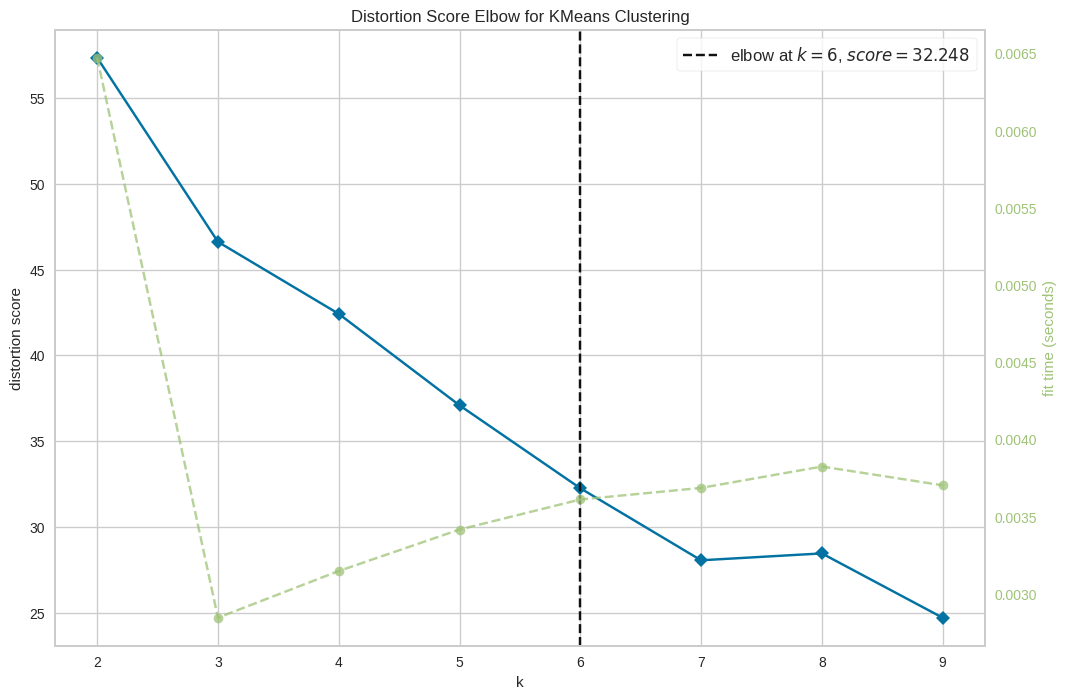

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [158]:
# Elbow Method for K means- Fuente: Indraneel Dutta Baruah
from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(X_train_reduced)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

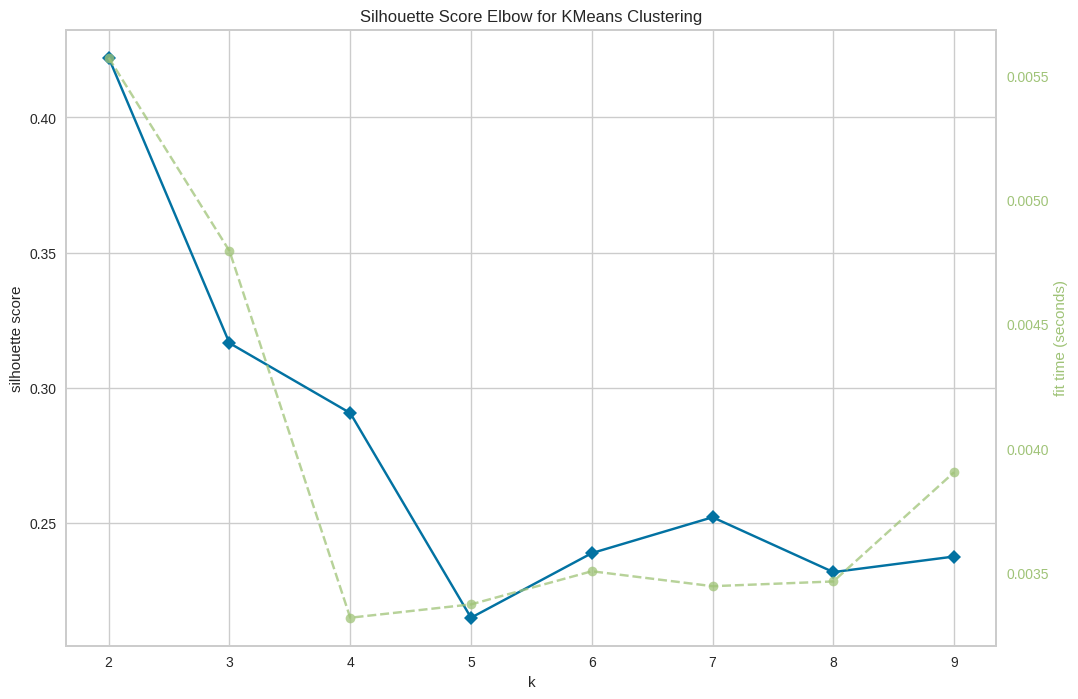

Optimal number of clusters based on silhouette score: [2]


In [159]:
# 2# Silhouette Score for K means. Fuente: Indraneel Dutta Baruah
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state =10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(X_train_reduced)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

## ETIQUETAR LA DATA PARA DESPUES TRABAJAR CON LOS SUPERVISADOS

In [160]:
from sklearn.cluster import KMeans
# Realiza el clustering con K-Means
kmeans = KMeans(n_clusters=3)  # Número de clusters obtenidos en promedio tecnicas de clusters
labels = kmeans.fit_predict(X_train_reduced)

In [161]:
# Agregación de las etiquetas numéricas al DataFrame
X_train_reduced['cluster_label'] = labels

In [162]:
X_train_reduced.head()

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
167                           0.4                             0.50   
180                           0.4                             0.50   
69                            0.4                             0.75   
239                           0.4                             0.75   
2                             0.4                             0.50   

     impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
167                  0.50                           0.333333   
180                  0.25                           0.333333   
69                   1.00                           1.000000   
239                  0.50                           0.666667   
2                    0.50                           0.666667   

     tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  cluster_label  
167                  0.00          0.00            0.0              0  
180                  0.25          0.25            0.0              0  
69                   0.25          0.00            0.0              0  
239                  0.25          0.50            1.0              1  
2                    0.25          0.75            0.0              0

In [163]:
print(X_train_reduced.groupby('cluster_label').size())

cluster_label
0    72
1    66
2    37
dtype: int64


In [164]:
# from google.colab import files
# X_train_reduced.to_csv('X_train_reduced.csv', index=False)
# files.download('X_train_reduced.csv')

In [165]:
# Crear un diccionario para mapear las etiquetas de cluster a nombres de vino
cluster_mapping = {0: 'NoVendePlataformasDigitales', 1: 'IndiferentePlataformasDigitales', 2:'SiVendePlataformasDigitales'}

# Crear la nueva columna 'wine_type' usando el mapeo
X_train_reduced['usoPlataformasDigitales'] = X_train_reduced['cluster_label'].map(cluster_mapping)

# Convertir la columna 'wine_type' a tipo categórico (opcional)
X_train_reduced['usoPlataformasDigitales'] = pd.Categorical(X_train_reduced['usoPlataformasDigitales'], categories=['NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales', 'SiVendePlataformasDigitales'])

# Mostrar el DataFrame resultante
X_train_reduced.head()

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
167                           0.4                             0.50   
180                           0.4                             0.50   
69                            0.4                             0.75   
239                           0.4                             0.75   
2                             0.4                             0.50   

     impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
167                  0.50                           0.333333   
180                  0.25                           0.333333   
69                   1.00                           1.000000   
239                  0.50                           0.666667   
2                    0.50                           0.666667   

     tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  cluster_label  \
167                  0.00          0.00            0.0              0   
180                  0.25          0.25            0.0              0   
69                   0.25          0.00            0.0              0   
239                  0.25          0.50            1.0              1   
2                    0.25          0.75            0.0              0   

             usoPlataformasDigitales  
167      NoVendePlataformasDigitales  
180      NoVendePlataformasDigitales  
69       NoVendePlataformasDigitales  
239  IndiferentePlataformasDigitales  
2        NoVendePlataformasDigitales

In [166]:
# Crear un copia del dataset "wine_df_scaled" y con otro nombre  y guardar en un csv con la opción de poder descargarlo
# from google.colab import files

# Create a copy of the DataFrame
X_train_reduced_copy = X_train_reduced.copy()

# Rename the copy (optional)
micronegocios_df = X_train_reduced_copy.rename(columns={'cluster_label': 'cluster'})

# Save the copy to a new CSV file
# micronegocios_df.to_csv('micronegocios_df.csv', index=False)

# Download the new CSV file
# files.download('micronegocios_df.csv')

In [167]:
micronegocios_df.head(1)

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
167                           0.4                              0.5   

     impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
167                   0.5                           0.333333   

     tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  cluster  \
167                   0.0           0.0            0.0        0   

         usoPlataformasDigitales  
167  NoVendePlataformasDigitales

In [168]:
# df_micronegocios = pd.read_csv('/content/micronegocios_df.csv')
df_micronegocios = micronegocios_df.copy()
df_micronegocios

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
167                           0.4                             0.50   
180                           0.4                             0.50   
69                            0.4                             0.75   
239                           0.4                             0.75   
2                             0.4                             0.50   
..                            ...                              ...   
188                           0.2                             0.50   
71                            0.2                             0.50   
106                           0.2                             0.25   
270                           0.8                             1.00   
102                           0.4                             0.75   

     impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
167                  0.50                           0.333333   
180                  0.25                           0.333333   
69                   1.00                           1.000000   
239                  0.50                           0.666667   
2                    0.50                           0.666667   
..                    ...                                ...   
188                  0.25                           0.000000   
71                   0.50                           0.666667   
106                  0.25                           0.000000   
270                  1.00                           1.000000   
102                  0.75                           0.666667   

     tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  cluster  \
167                  0.00          0.00            0.0        0   
180                  0.25          0.25            0.0        0   
69                   0.25          0.00            0.0        0   
239                  0.25          0.50            1.0        1   
2                    0.25          0.75            0.0        0   
..                    ...           ...            ...      ...   
188                  0.25          0.25            0.0        0   
71                   0.00          0.25            0.0        0   
106                  0.00          0.00            1.0        2   
270                  0.50          0.25            1.0        1   
102                  0.00          0.00            1.0        1   

             usoPlataformasDigitales  
167      NoVendePlataformasDigitales  
180      NoVendePlataformasDigitales  
69       NoVendePlataformasDigitales  
239  IndiferentePlataformasDigitales  
2        NoVendePlataformasDigitales  
..                               ...  
188      NoVendePlataformasDigitales  
71       NoVendePlataformasDigitales  
106      SiVendePlataformasDigitales  
270  IndiferentePlataformasDigitales  
102  IndiferentePlataformasDigitales  

[175 rows x 9 columns]

In [169]:
df_micronegocios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 167 to 102
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   VentasMensualesPlatDigitales       175 non-null    float64 
 1   impactoUtilidadEmpresa_enconded    175 non-null    float64 
 2   impactoVentasEmpresa               175 non-null    float64 
 3   impactoCrecimientoEmpresa_encoded  175 non-null    float64 
 4   tiempoUsoPlatDigital               175 non-null    float64 
 5   numEmpleados                       175 non-null    float64 
 6   PlatDig_Nequi                      175 non-null    float64 
 7   cluster                            175 non-null    int32   
 8   usoPlataformasDigitales            175 non-null    category
dtypes: category(1), float64(7), int32(1)
memory usage: 11.9 KB


In [170]:
print(df_micronegocios.groupby('usoPlataformasDigitales').size())

usoPlataformasDigitales
NoVendePlataformasDigitales        72
IndiferentePlataformasDigitales    66
SiVendePlataformasDigitales        37
dtype: int64


In [171]:
# Obtenemos variables independientes
X = df_micronegocios.drop(["usoPlataformasDigitales", "cluster"], axis = 1)
X.head()

VentasMensualesPlatDigitales  impactoUtilidadEmpresa_enconded  \
167                           0.4                             0.50   
180                           0.4                             0.50   
69                            0.4                             0.75   
239                           0.4                             0.75   
2                             0.4                             0.50   

     impactoVentasEmpresa  impactoCrecimientoEmpresa_encoded  \
167                  0.50                           0.333333   
180                  0.25                           0.333333   
69                   1.00                           1.000000   
239                  0.50                           0.666667   
2                    0.50                           0.666667   

     tiempoUsoPlatDigital  numEmpleados  PlatDig_Nequi  
167                  0.00          0.00            0.0  
180                  0.25          0.25            0.0  
69                   0.25          0.00            0.0  
239                  0.25          0.50            1.0  
2                    0.25          0.75            0.0

In [172]:
# Obtenemos variable dependiente
Y = df_micronegocios.pop('usoPlataformasDigitales')
Y

167        NoVendePlataformasDigitales
180        NoVendePlataformasDigitales
69         NoVendePlataformasDigitales
239    IndiferentePlataformasDigitales
2          NoVendePlataformasDigitales
                    ...               
188        NoVendePlataformasDigitales
71         NoVendePlataformasDigitales
106        SiVendePlataformasDigitales
270    IndiferentePlataformasDigitales
102    IndiferentePlataformasDigitales
Name: usoPlataformasDigitales, Length: 175, dtype: category
Categories (3, object): ['NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales',
                         'SiVendePlataformasDigitales']

###Aplicando Super Vector Machines

In [173]:
X_trainNew, X_testNew, y_trainNew, y_testNew = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [174]:
model = svm.SVC(kernel='linear', C=100).fit(X_trainNew, y_trainNew)

In [175]:
# # Grabamos el modelo en el directorio
# pkl_filename = "pickle_modelsvm.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(model, file)

In [176]:
# # Funcion para cargar el modelo
# pkl_filename = "pickle_modelsvm.pkl"
# with open(pkl_filename, 'rb') as file:
#     model = pickle.load(file)

In [177]:
# Encontramos el accuracy promedio usando datos de test
score = model.score(X_testNew, y_testNew)
print(score)

1.0


In [178]:
y_pred = model.predict(X_testNew)
y_pred

array(['SiVendePlataformasDigitales', 'NoVendePlataformasDigitales',
       'SiVendePlataformasDigitales', 'IndiferentePlataformasDigitales',
       'NoVendePlataformasDigitales', 'NoVendePlataformasDigitales',
       'SiVendePlataformasDigitales', 'NoVendePlataformasDigitales',
       'NoVendePlataformasDigitales', 'SiVendePlataformasDigitales',
       'IndiferentePlataformasDigitales', 'NoVendePlataformasDigitales',
       'NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales',
       'IndiferentePlataformasDigitales', 'SiVendePlataformasDigitales',
       'NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales',
       'NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales',
       'SiVendePlataformasDigitales', 'IndiferentePlataformasDigitales',
       'NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales',
       'NoVendePlataformasDigitales', 'SiVendePlataformasDigitales',
       'IndiferentePlataformasDigitales', 'NoVendePlataformasDigitales'

                                 precision    recall  f1-score   support

IndiferentePlataformasDigitales       1.00      1.00      1.00        11
    NoVendePlataformasDigitales       1.00      1.00      1.00        13
    SiVendePlataformasDigitales       1.00      1.00      1.00        11

                       accuracy                           1.00        35
                      macro avg       1.00      1.00      1.00        35
                   weighted avg       1.00      1.00      1.00        35

Accuracy: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0 11]]


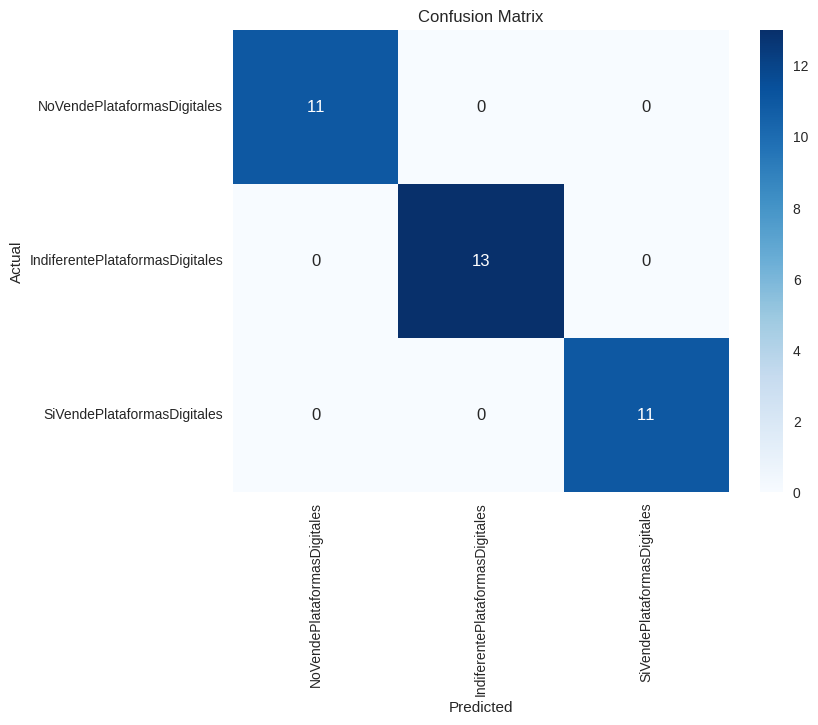

In [179]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score

ACC_SVM = accuracy_score(y_testNew, y_pred)
REC_SVM = recall_score(y_testNew, y_pred, average='weighted')
F1_SVM = f1_score(y_testNew, y_pred, average='weighted')
CR_SVM = classification_report(y_testNew, y_pred)

print(CR_SVM)
print("Accuracy:", ACC_SVM)
print("Recall:", REC_SVM) # weighted to handle multi-class
print("F1-score:", F1_SVM) # weighted to handle multi-class
cm_SVM = confusion_matrix(y_testNew, y_pred)
print("Confusion Matrix:")
print(cm_SVM)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm_SVM, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales', 'SiVendePlataformasDigitales'],
            yticklabels=['NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales','SiVendePlataformasDigitales'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Probamos una muestra nueva

In [180]:
import warnings
from sklearn.exceptions import InconsistentVersionWarning

warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

In [181]:
import warnings #para sumprimir los errores de del mensaje
warnings.filterwarnings("ignore", message="X does not have valid feature names")
x_in = np.asarray([0.4, 0.75, 0.75, 0.5, 0.666666666666666, 0, 0]).reshape(1,-1)
predicts = model.predict(x_in)
predicts[0]

'NoVendePlataformasDigitales'

                                 precision    recall  f1-score   support

IndiferentePlataformasDigitales       0.92      1.00      0.96        11
    NoVendePlataformasDigitales       1.00      1.00      1.00        13
    SiVendePlataformasDigitales       1.00      0.91      0.95        11

                       accuracy                           0.97        35
                      macro avg       0.97      0.97      0.97        35
                   weighted avg       0.97      0.97      0.97        35

Accuracy: 0.9714285714285714
Recall: 0.9714285714285714
F1-score: 0.9713694173321502
Confusion Matrix for SVM:
[[11  0  0]
 [ 0 13  0]
 [ 1  0 10]]


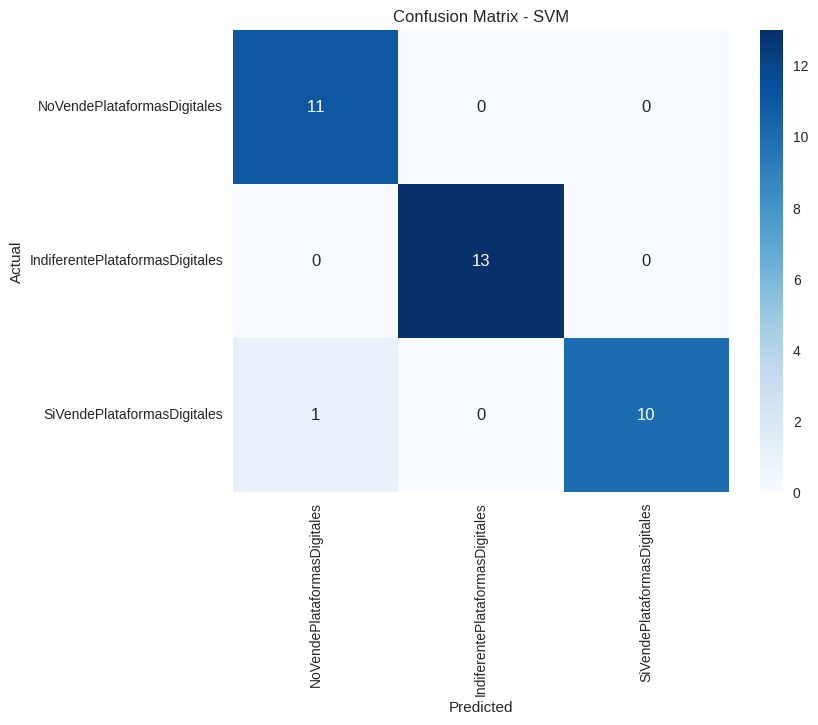

In [182]:
from sklearn.svm import SVC  # Para Support Vector Machine
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el modelo SVM
model_svm = SVC(kernel='linear')  # Puedes probar otros kernels, como 'rbf' o 'poly'
model_svm.fit(X_trainNew, y_trainNew)

# Predecir las etiquetas para el conjunto de prueba
y_pred_svm = model_svm.predict(X_testNew)

# Calcular métricas de rendimiento
ACC_SVM = accuracy_score(y_testNew, y_pred_svm)
REC_SVM = recall_score(y_testNew, y_pred_svm, average='weighted')
F1_SVM = f1_score(y_testNew, y_pred_svm, average='weighted')
CR_SVM = classification_report(y_testNew, y_pred_svm)

# Mostrar las métricas
print(CR_SVM)
print("Accuracy:", ACC_SVM)
print("Recall:", REC_SVM)  # 'weighted' para manejar múltiples clases
print("F1-score:", F1_SVM)  # 'weighted' para manejar múltiples clases

# Calcular y mostrar la matriz de confusión
cm_svm = confusion_matrix(y_testNew, y_pred_svm)
print("Confusion Matrix for SVM:")
print(cm_svm)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales', 'SiVendePlataformasDigitales'],
            yticklabels=['NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales', 'SiVendePlataformasDigitales'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

In [183]:
import numpy as np

# Nueva entrada de datos
x_in = np.asarray([0.4, 0.75, 0.75, 0.5, 0.666666666666666, 0, 0]).reshape(1, -1)

# Realizar la predicción con el modelo SVM
predicts_svm = model_svm.predict(x_in)

# Mostrar el resultado de la predicción
print(predicts_svm[0])

NoVendePlataformasDigitales


## Aplicando Naybe Bayes

                                 precision    recall  f1-score   support

IndiferentePlataformasDigitales       0.92      1.00      0.96        11
    NoVendePlataformasDigitales       1.00      1.00      1.00        13
    SiVendePlataformasDigitales       1.00      0.91      0.95        11

                       accuracy                           0.97        35
                      macro avg       0.97      0.97      0.97        35
                   weighted avg       0.97      0.97      0.97        35

Accuracy: 0.9714285714285714
Recall: 0.9714285714285714
F1-score: 0.9713694173321502
Confusion Matrix for Naive Bayes:
[[11  0  0]
 [ 0 13  0]
 [ 1  0 10]]


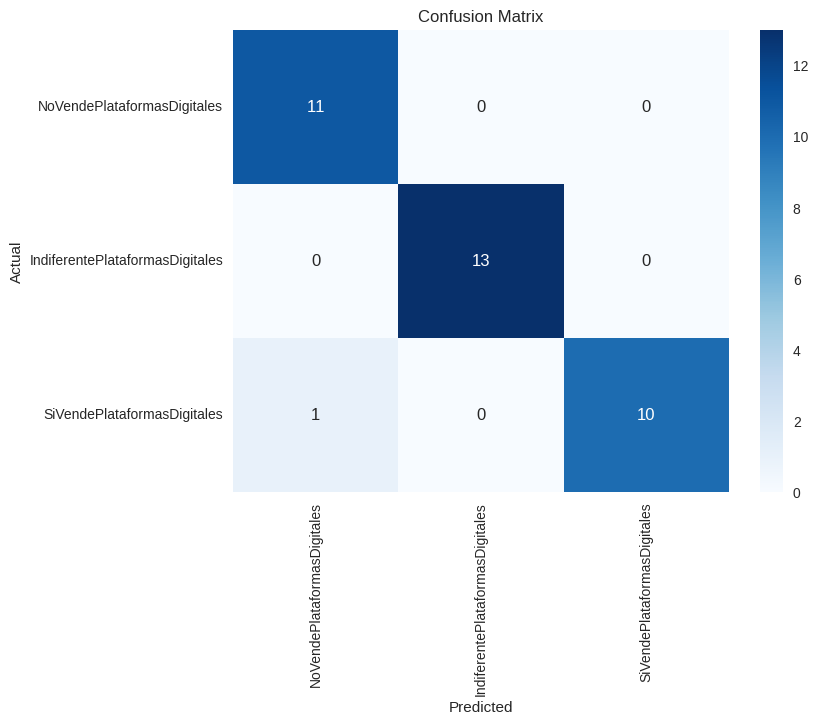

In [184]:
from sklearn.naive_bayes import GaussianNB  # Para Naive Bayes
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

model_nb = GaussianNB()
model_nb.fit(X_trainNew, y_trainNew)



# Predecir las etiquetas para el conjunto de prueba
y_pred_nb = model_nb.predict(X_testNew)

ACC_NB = accuracy_score(y_testNew, y_pred_nb)
REC_NB = recall_score(y_testNew, y_pred_nb, average='weighted')
F1_NB = f1_score(y_testNew, y_pred_nb, average='weighted')
CR_NB = classification_report(y_testNew, y_pred_nb)

# Calcular y mostrar las métricas de clasificación
print(CR_NB)
print("Accuracy:", ACC_NB)
print("Recall:", REC_NB)  # 'weighted' para manejar múltiples clases
print("F1-score:", F1_NB)  # 'weighted' para manejar múltiples clases

# Calcular la matriz de confusión
cm_nb = confusion_matrix(y_testNew, y_pred_nb)
print("Confusion Matrix for Naive Bayes:")
print(cm_nb)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales', 'SiVendePlataformasDigitales'],
            yticklabels=['NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales','SiVendePlataformasDigitales'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [185]:
import numpy as np

# Nueva entrada de datos, similar a la que usaste con SVM
x_in = np.asarray([0.4, 0.75, 0.75, 0.5, 0.666666666666666, 0, 0]).reshape(1, -1)

# Realizar la predicción con el modelo de Naive Bayes
predicts_nb = model_nb.predict(x_in)

# Mostrar el resultado de la predicción
print(predicts_nb[0])

NoVendePlataformasDigitales


## Aplicando KNN

                                 precision    recall  f1-score   support

IndiferentePlataformasDigitales       0.92      1.00      0.96        11
    NoVendePlataformasDigitales       1.00      1.00      1.00        13
    SiVendePlataformasDigitales       1.00      0.91      0.95        11

                       accuracy                           0.97        35
                      macro avg       0.97      0.97      0.97        35
                   weighted avg       0.97      0.97      0.97        35

Accuracy: 0.9714285714285714
Recall: 0.9714285714285714
F1-score: 0.9713694173321502
Confusion Matrix for KNN:
[[11  0  0]
 [ 0 13  0]
 [ 1  0 10]]


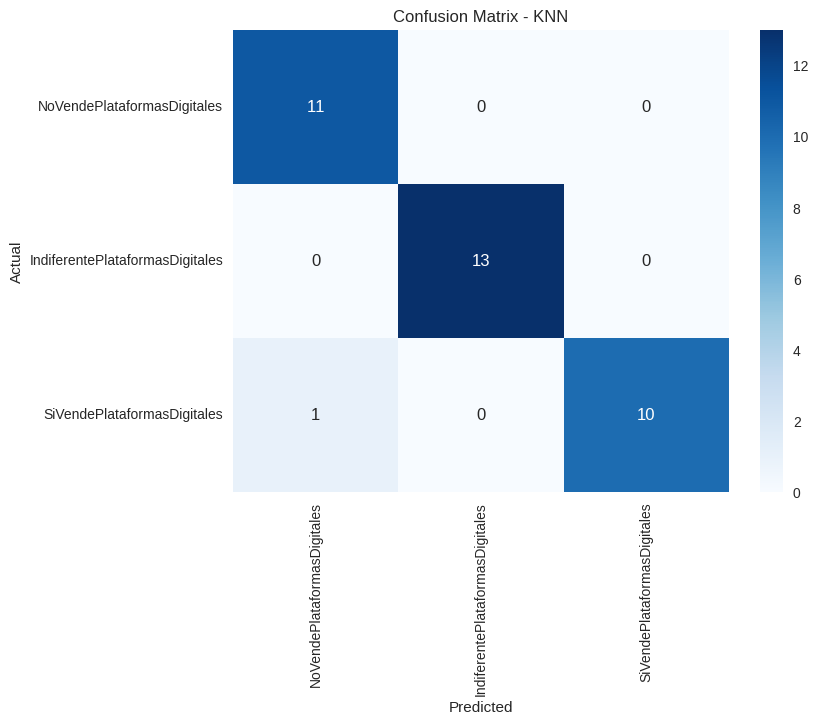

In [186]:
from sklearn.neighbors import KNeighborsClassifier  # Para KNN
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el modelo KNN (con K=3, puedes cambiarlo según sea necesario)
model_knn = KNeighborsClassifier(n_neighbors=3)

# Ajustar el modelo con los datos de entrenamiento
model_knn.fit(X_trainNew, y_trainNew)

# Predecir las etiquetas para el conjunto de prueba
y_pred_knn = model_knn.predict(X_testNew)

# Calcular las métricas
ACC_KNN = accuracy_score(y_testNew, y_pred_knn)
REC_KNN = recall_score(y_testNew, y_pred_knn, average='weighted')
F1_KNN = f1_score(y_testNew, y_pred_knn, average='weighted')
CR_KNN = classification_report(y_testNew, y_pred_knn)

# Calcular y mostrar las métricas de clasificación
print(CR_KNN)
print("Accuracy:", ACC_KNN)
print("Recall:", REC_KNN)  # 'weighted' para manejar múltiples clases
print("F1-score:", F1_KNN)  # 'weighted' para manejar múltiples clases

# Calcular la matriz de confusión
cm_knn = confusion_matrix(y_testNew, y_pred_knn)
print("Confusion Matrix for KNN:")
print(cm_knn)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales', 'SiVendePlataformasDigitales'],
            yticklabels=['NoVendePlataformasDigitales', 'IndiferentePlataformasDigitales','SiVendePlataformasDigitales'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

In [187]:
# Supón que tienes los datos de entrada que deseas predecir
# Aquí un ejemplo de cómo se haría con un solo punto de entrada:
x_in_knn = np.asarray([0.4, 0.75, 0.75, 0.5, 0.666666666666666, 0, 0]).reshape(1, -1)  # Datos de entrada

# Realizar la predicción utilizando el modelo KNN
prediction_knn = model_knn.predict(x_in_knn)

# Mostrar la predicción
print(prediction_knn[0])

NoVendePlataformasDigitales


## Metricas Modelo Random Forest Obtenido

In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Separar los datos de entrenamiento y prueba, asegurándonos de que la variable 'VentasMensualesPlatDigitales' sea el objetivo
X_tr = train_set_RFMetrics.drop('VentasMensualesPlatDigitales', axis=1)  # Eliminar la variable objetivo
y_tr = train_set_RFMetrics['VentasMensualesPlatDigitales']  # Variable objetivo
X_te = test_set_RFMetrics.drop('VentasMensualesPlatDigitales', axis=1)  # Eliminar la variable objetivo
y_te = test_set_RFMetrics['VentasMensualesPlatDigitales']  # Variable objetivo

# Entrenar el modelo Random Forest de regresión con X_train y y_train
clf_rnd_reg = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd_reg.fit(X_tr, y_tr)

# Realizar predicciones en el conjunto de prueba
y_pr = clf_rnd_reg.predict(X_te)

# Calcular las métricas de regresión
mse_RF = mean_squared_error(y_te, y_pr)  # Error cuadrático medio
r2_RF = r2_score(y_te, y_pr)  # R² score

# Imprimir resultados
print("Mean Squared Error (MSE):", mse_RF)
print("R^2 Score:", r2_RF)

Mean Squared Error (MSE): 0.04355038138707038
R^2 Score: 0.029208007118391777


In [189]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_tr, y_tr)

best_model = grid_search.best_estimator_
best_r2 = grid_search.best_score_
print("Best R² Score from Grid Search:", best_r2)

Best R² Score from Grid Search: 0.2769079432621135


In [190]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [191]:
# Grabamos el modelo en el directorio
pkl_filename = "pickle_modelsvm.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [192]:
# Funcion para cargar el modelo
pkl_filename = "pickle_modelsvm.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

In [193]:
# pip uninstall cuda-python

Found existing installation: cuda-python 12.2.1
Uninstalling cuda-python-12.2.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cuda/*
    /usr/local/lib/python3.10/dist-packages/cuda_python-12.2.1.dist-info/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 722, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 364, in remove
    if auto_confirm or self._allowed_to_proceed(verbose):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.p

In [194]:
# pip freeze > requirements.txt